# Sequencing analysis of plasmids


## Nanopore Sequencing

The library preparation for the plasmids was performed using the "Rapid Sequencing gDNA (SQK-RAD004)" kit from Oxford Nanopore. For this kit no linearization is needed before Library Prep. The Sequencing adapters are attached to the DNA by an Transposase. One Flongle Flow Cell for each plasmid in combination with the MinIon Mk1C was used for sequencing. Guppys HAC-mode was used for basecalling. The duration of sequencing was 18 hours (donor and donorguide) respectively ~22 hours for pBR.
<br>
<br>
The Library Preparation can be splited into three main steps.
- Tagment your DNA using the Fragmentation Mix in the kit
- Attach sequencing adapters supplied in the kit to the DNA ends
- Prime the flow cell, and load your DNA library into the flow cell

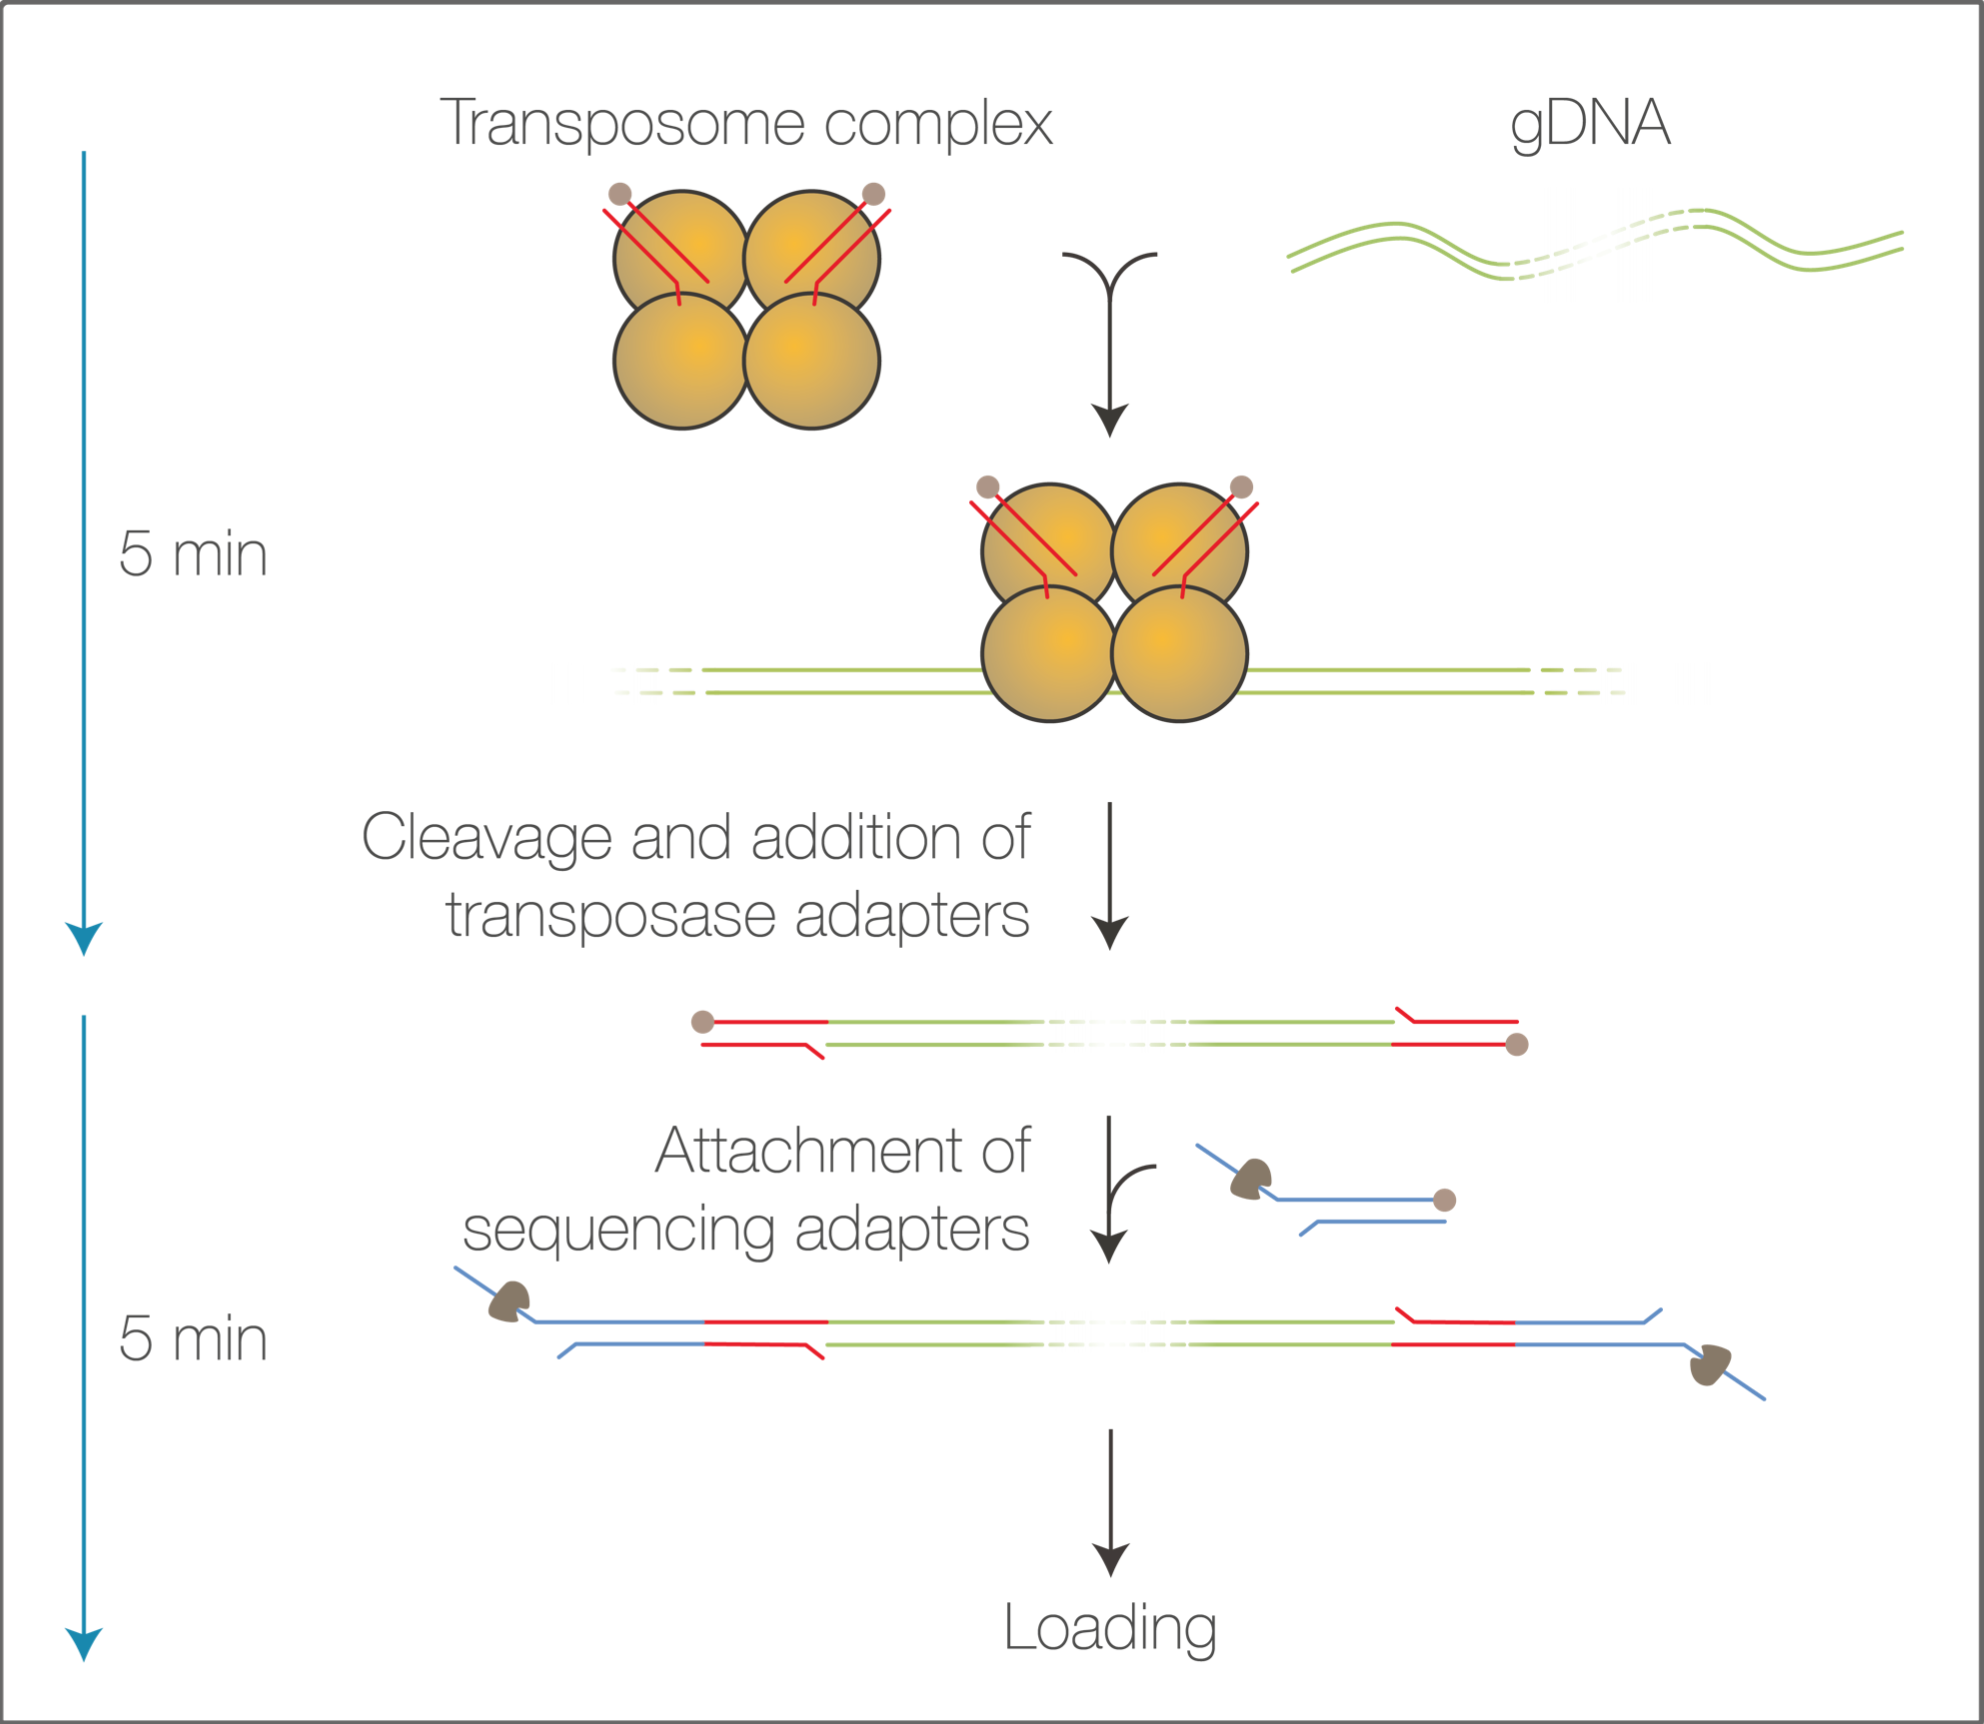

Schematic overview of the library preparation. Source: [Oxford Nanopore](https://nanoporetech.com/)


# Preface
<span style='color:red '> The ! at the beginning of most commands are used to be able to use bash commands in jupyter notebook. If you are working directly in the terminal, you must omit them. </span>

It is highly recommended to <span style='color:red '> use virtual environments </span> for the bioinformatic analysis, because you need to install a lot of different tools. These tools need different and sometimes incompatible dependencies. I recommend to use [conda](https://www.anaconda.com/) (with [bioconda](https://bioconda.github.io/) channel) to manage your environments and to install most of the tools.





# Plasmid Donor

Band on gel electrophoresis at round about 3500 bp to 4000 bp. Sequence assembly should be inside this range. The generated data from the MinIon could be saved on a harddrive. We can now use this data for our bioinformatical analysis.

In [6]:
!ls -l /Users/nschoen/Desktop/plasmids/plasmid_donor_1/plz_donor/20220608_1238_MC-110674_AFU936_eeb243c0/

total 133312
-rwxrwxrwx    1 nschoen  staff       245 10 Jun 07:33 barcode_alignment_AFU936_d5b96b58.tsv
drwxrwxrwx   63 nschoen  staff      2016 10 Jun 07:33 fast5_fail
drwxrwxrwx  138 nschoen  staff      4416 10 Jun 07:50 fast5_pass
drwxrwxrwx   63 nschoen  staff      2016 10 Jun 07:25 fastq_fail
drwxrwxrwx  138 nschoen  staff      4416 10 Jun 07:27 fastq_pass
-rwxrwxrwx    1 nschoen  staff       634 10 Jun 07:25 final_summary_AFU936_d5b96b58.txt
drwxrwxrwx    3 nschoen  staff        96 10 Jun 07:25 other_reports
-rwxrwxrwx    1 nschoen  staff    390105 10 Jun 07:27 pore_activity_AFU936_d5b96b58.csv
-rwxrwxrwx@   1 nschoen  staff   1143833 10 Jun 07:27 report_AFU936_20220608_1239_eeb243c0.html
-rwxrwxrwx    1 nschoen  staff    333338 10 Jun 07:25 report_AFU936_20220608_1239_eeb243c0.json
-rwxrwxrwx    1 nschoen  staff    473273 10 Jun 07:25 report_AFU936_20220608_1239_eeb243c0.md
-rwxrwxrwx    1 nschoen  staff       177 10 Jun 07:33 sample_sheet_AFU936_20220608_1239_eeb243c0.csv
-rwx

Above you can see alle the data given by the MinIon after a sequencing run. We have directories like this for each of the three sequenced plasmids. Important for us are the ```fast5_*``` and ```fastq_*``` directories and the files ``` report_AFU936_20220608_1239_eeb243c0.html ``` and ```sequencing_summary_AFU936_d5b96b58.txt ```. The two fast5 directories contain the sequences as raw data and the fastq directories contain the basecalled sequences in fastq format. The folders with the suffix ```_fail``` contain only sequences with a Q-score < 9 and the folders with the suffix ```_pass``` contain all reads with a Q-score greater than or equal to 9. ```fastq_pass``` contains many fastq files which in each case contain 1000 reads. 

## Quality Control
Quality control is the first step in almost all sequencing projects. It gives you an overview of your sequencing run and the generated data. The most interesting aspects are the amount of sequenced bases, the length of the reads and the quality of the reads. It is important to know your initial data well, because all further steps are based on it. Quality control can also indicate whether the sequencing run needs to be repeated.


###  MinION Mk1C Final report
To get a first overview of the sequencing run, I usually use the Final report, which is generated by the MinIon directly during sequencing. Parts of the report are even displayed live on the sequencer during the run. The report provides an overview of the quality of the sequencing, the number of active nanopores, the translocation speed and the number, length and quality of the generated reads. 

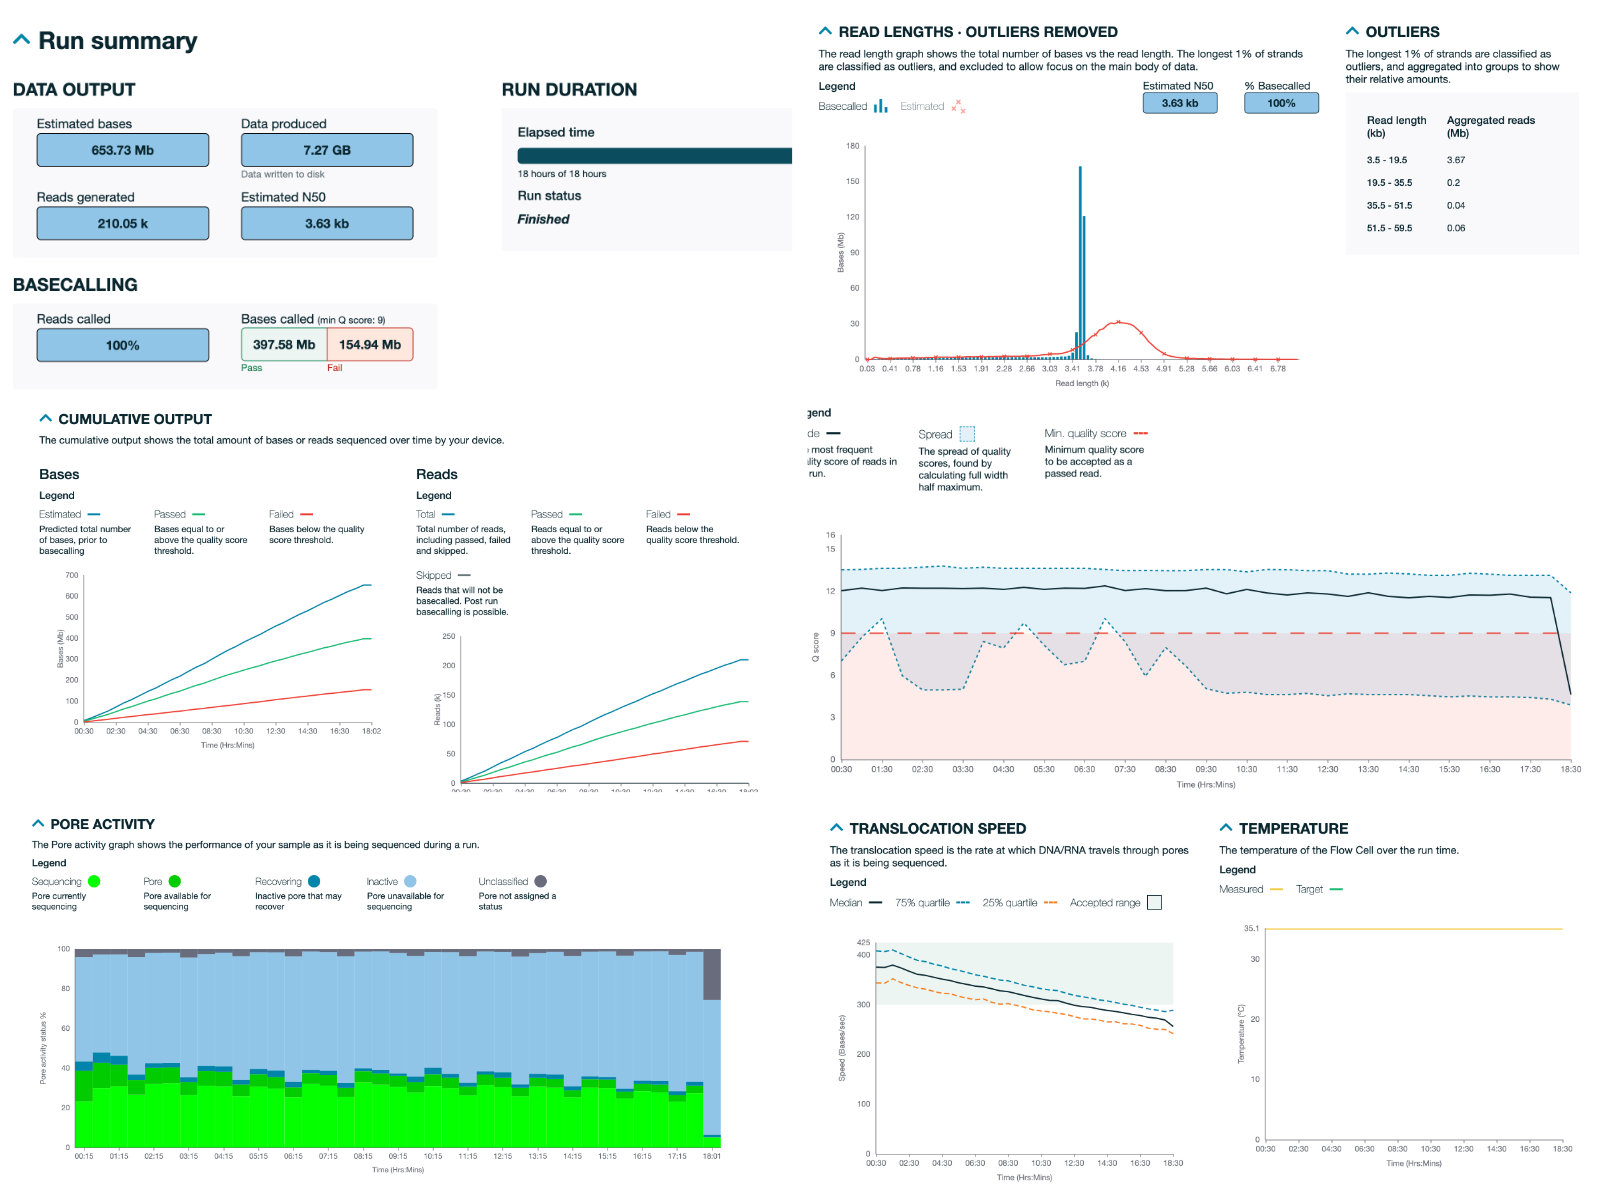

Some parts of the sequencing report for plasmid_donor from the ``` report_AFU936_20220608_1239_eeb243c0.html ```

### NanoPlot
Nanoplot is a plotting tool for long read sequencing data and alignments. As output data we use the summary file ```sequencing_summary_AFU936_d5b96b58.txt ```. It is also possible to use the fastq files as input, but this is more computational intensiv an you don't get all plots. NanoPlot gives you a better overview about your sequencing data than the Nanopore sequencing report.  


[NanoPlot on GitHub](https://github.com/wdecoster/NanoPlot)
<br>Wouter De Coster, Svenn D’Hert, Darrin T Schultz, Marc Cruts, Christine Van Broeckhoven, NanoPack: visualizing and processing long-read sequencing data, Bioinformatics, Volume 34, Issue 15, 01 August 2018, Pages 2666–2669, https://doi.org/10.1093/bioinformatics/bty149





In [9]:
mkdir nanoplot

In [10]:
!nanoplot -t 10 -o ./nanoplot/  -p "plz_donor_" -f svg --drop_outliers --plots kde --loglength --N50 
--title "plz_donor" --summary sequencing_summary_AFU936_d5b96b58.txt 



#### Used options:
|Option short|Option long|Usage|
|:---:|:---|:---|
|-t   | --threads             |Set the allowed number of threads to be used by the script.|
| -o  | --outdir              |Specify directory in which output has to be created.|
| -p  | --prefix              |Specify an optional prefix to be used for the output files.|
| -f  | --format              |Specify the output format of the plots, which are in addition to the html files.|
|     | --drop_outliers       |Drop outlier reads with extreme long length.|
|     | --loglength           |Additionally show logarithmic scaling of lengths in plots.|
|     | --plots               |Specify which bivariate plots have to be made.|
|     | --N50                 |Show the N50 mark in the read length histogram.|
|     | --title               |Add a title to all plots, requires quoting if using spaces.|
|     | --summary             |Data is in one or more summary file(s) generated by albacore or guppy.|
    


#### Example of Nanoplot results


This figure gives us a good representation of read length and quality.  We see that the majority of our reads have a legth of ~3000 bases. Further we see that we have a lot of reads with a Q-Score of 10 to 14. This ist a good quality for nanopore sequencing. 


In the quality control we also see that we have 347.1 Mb over Q 10. Given that our plasmid is only between 3500 and 4000 bp in size, we have an extremely high number of good reads available for analysis.

In [9]:
ls -l nanoplot/

total 13192
-rw-r--r--  1 nschoen  staff    10136 13 Jun 13:38 plz_donor_ActivePores_Over_Time.html
-rw-r--r--  1 nschoen  staff    25398 13 Jun 13:39 plz_donor_ActivePores_Over_Time.svg
-rw-r--r--  1 nschoen  staff     8855 13 Jun 13:38 plz_donor_ActivityMap_ReadsPerChannel.html
-rw-r--r--  1 nschoen  staff    21416 13 Jun 13:38 plz_donor_ActivityMap_ReadsPerChannel.svg
-rw-r--r--  1 nschoen  staff    11096 13 Jun 13:38 plz_donor_CumulativeYieldPlot_Gigabases.html
-rw-r--r--  1 nschoen  staff    26165 13 Jun 13:38 plz_donor_CumulativeYieldPlot_Gigabases.svg
-rw-r--r--  1 nschoen  staff    10517 13 Jun 13:38 plz_donor_CumulativeYieldPlot_NumberOfReads.html
-rw-r--r--  1 nschoen  staff    25794 13 Jun 13:38 plz_donor_CumulativeYieldPlot_NumberOfReads.svg
-rw-r--r--  1 nschoen  staff   476098 13 Jun 13:38 plz_donor_LengthvsQualityScatterPlot_dot.html
-rw-r--r--  1 nschoen  staff   100499 13 Jun 13:38 plz_donor_LengthvsQualityScatterPlot_dot.svg
-rw-r--r--  1 nschoen  staff   708387 13 Ju

## Read filtering

It makes sense to filter the data before further analysis. Disproportionately long reads and reads with very poor quality should be filtered out. However, it is important to filter only so much that no important information is lost or no longer enough data is available. In our case we could filter out a lot of data due to the large amount of data and the very short plasmid, but since we want to use the tool Trycycler and there a very high coverage is advantageous we will not exclude too much data. 


### Preparation

The first thing we have to to is to unzip all the fastq files in the ```fastq_pass``` directory.
To make filtering more easy we have to concatenate all the fastq files. After that we have only one large file wich we can use as input for our filtering tool.

In [47]:
!gunzip -r fastq_pass

gunzip: fastq_pass/AFU936_pass_d5b96b58_66.fastq: unknown suffix -- ignored
gunzip: fastq_pass/AFU936_pass_d5b96b58_23.fastq: unknown suffix -- ignored
gunzip: fastq_pass/AFU936_pass_d5b96b58_111.fastq: unknown suffix -- ignored
gunzip: fastq_pass/AFU936_pass_d5b96b58_82.fastq: unknown suffix -- ignored
gunzip: fastq_pass/AFU936_pass_d5b96b58_135.fastq: unknown suffix -- ignored
gunzip: fastq_pass/AFU936_pass_d5b96b58_108.fastq: unknown suffix -- ignored
gunzip: fastq_pass/AFU936_pass_d5b96b58_5.fastq: unknown suffix -- ignored
gunzip: fastq_pass/AFU936_pass_d5b96b58_42.fastq: unknown suffix -- ignored
gunzip: fastq_pass/AFU936_pass_d5b96b58_7.fastq: unknown suffix -- ignored
gunzip: fastq_pass/AFU936_pass_d5b96b58_40.fastq: unknown suffix -- ignored
gunzip: fastq_pass/AFU936_pass_d5b96b58_38.fastq: unknown suffix -- ignored
gunzip: fastq_pass/AFU936_pass_d5b96b58_80.fastq: unknown suffix -- ignored
gunzip: fastq_pass/AFU936_pass_d5b96b58_59.fastq: unknown suffix -- ignored
gunzip: fas

In [48]:
cd fastq_pass/

/Users/nschoen/Desktop/plasmide/plasmid_donor_1/fastq_pass


In [52]:
!cat *.fastq > donor_1_pass.fastq

## Nanofilt

There are many tool out there for filtering our sequencing reads. I decided to use Nanofilt. Removing reads with a length between 1000 and 4000 bp, because most (long read) assemblers didn't use reads with a length below 1000 bp. Also we remove all reads with an Q-Score below 12. For quality assessment of the reads we use the summary file from Guppy Basecaller.


[Nanofilt on GitHub](https://github.com/wdecoster/nanofilt)
<br>Wouter De Coster, Svenn D’Hert, Darrin T Schultz, Marc Cruts, Christine Van Broeckhoven, NanoPack: visualizing and processing long-read sequencing data, Bioinformatics, Volume 34, Issue 15, 01 August 2018, Pages 2666–2669, https://doi.org/10.1093/bioinformatics/bty149

In [5]:
!nanofilt -q 12 -l 1000 --maxlength 4000 -s ../sequencing_summary_AFU936_d5b96b58.txt donor_1_pass.fastq > filtered_reads_donor_1.fastq

### Used options:
|Option short|Option long|Usage|
|:---:|:---|:---|
|-q   |--quality   | Filter on a minimum average read quality score.|
|-l   |--length    | Filter on a minimum read length.|
|     |--maxlength | Filter on a maximum read length.|
|-s   |--summary   | Use guppy summary file for quality scores.|


In [1]:
cd fastq_pass/

/Users/nschoen/Desktop/plasmide/plasmid_donor_1/fastq_pass


## Quality Control after filtering

Quality control of the reads after filtering. This time the filtered fastq reads serve as input. This should give us a visual control for the previous filtering step. 

In [3]:
mkdir ../nanoplot_filtered

In [6]:
!gunzip filtered_reads_donor_1.fastq.gz

In [7]:
!nanoplot -t 10 -o ../nanoplot_filtered/  -p "plz_donor_filtered_" -f svg --plots kde -c red --loglength --N50 --title "plz_donor_filtered" --fastq ./filtered_reads_donor_1.fastq 




In the NanoPlot figure we see that we now have a really good data set. Q12 ~ 94% accuracy

## Assembly
Now that our data has been prepared, we can start with the actual assembly. There are a lot of tools available for this. I decided to use Trycycler. This tool creates an assembly from several initial assemblies that were previously created with other tools. For the initial assemblies I chose Flye, Raven, Miniasm and Canu. But there are more tools you could use. Don't be afraid to try other tools and compare the results.  

Wick RR and Holt KE. Benchmarking of long-read assemblers for prokaryote whole genome sequencing [version 4; peer review: 4 approved]. F1000Research 2021, 8:2138 (https://doi.org/10.12688/f1000research.21782.4)

## Trycycler
Trycycler is a tool for generating consensus long-read assemblies for bacterial genomes. I.e. if you have multiple long-read assemblies for the same isolate, Trycycler can combine them into a single assembly that is better than any of your inputs.

[Trycycler on GitHub](https://github.com/rrwick/Trycycler)
<br>Wick, R.R., Judd, L.M., Cerdeira, L.T. et al. Trycycler: consensus long-read assemblies for bacterial genomes. Genome Biol 22, 266 (2021). https://doi.org/10.1186/s13059-021-02483-z


We use this assembler because it produces very good assemblies of prokaryotic genomes and because it is well suited for our large data set. Below you can see a graphical overview of the following steps for Trycycler. For more details I recommend the very good Trycycler Wiki on GitHub


In [1]:
from IPython import display
display.Image("https://github.com/rrwick/Trycycler/wiki/images/pipeline.png")


### Step 0: Subsampling

Trycycler subsample tries to make maximally-independent read subsets of an appropriate depth our dataset. In the next step we will use these subsamples as input to create 16 assemblies with 4 different assembly tools. 

In [30]:
pwd

'/Users/nschoen/Desktop/plasmide/plasmid_donor_1'

In [32]:
ls -l

total 154312
-rw-r--r--@   1 nschoen  staff   7293956 28 Jun 15:10 assembly_donor.ipynb
-rw-r--r--    1 nschoen  staff       245  9 Jun 15:50 barcode_alignment_AFU936_d5b96b58.tsv
drwxr-xr-x   63 nschoen  staff      2016  9 Jun 16:18 fast5_fail/
drwxr-xr-x  138 nschoen  staff      4416  9 Jun 15:50 fast5_pass/
drwxr-xr-x   63 nschoen  staff      2016  9 Jun 16:18 fastq_fail/
drwxr-xr-x  141 nschoen  staff      4512 21 Jun 14:14 fastq_pass/
-rw-r--r--    1 nschoen  staff       634  9 Jun 15:42 final_summary_AFU936_d5b96b58.txt
drwxr-xr-x@  38 nschoen  staff      1216 13 Jun 14:37 nanoplot/
drwxr-xr-x@  20 nschoen  staff       640 14 Jun 16:05 nanoplot_filtered/
drwxr-xr-x    3 nschoen  staff        96  9 Jun 16:18 other_reports/
-rw-r--r--    1 nschoen  staff    390105  9 Jun 16:18 pore_activity_AFU936_d5b96b58.csv
-rw-r--r--@   1 nschoen  staff   1143833  9 Jun 15:42 report_AFU936_20220608_1239_eeb243c0.html
-rw-r--r--    1 nschoen  staff    333338  9 Jun 16:18 report_AFU936_20220608_1

In [33]:
mkdir donor_subsets

In [9]:
!gunzip fastq_pass/donor_1_pass.fastq.gz 

In [34]:
!trycycler subsample --reads fastq_pass/filtered_reads_donor_1.fastq --out_dir donor_subsets --genome_size 4000 --count 16


Starting Trycycler read subsampling (2022-06-28 15:10:48)
    Trycycler subsample is a tool for subsampling a long-read set into subsets
that are maximally independent from each other.

Output directory already exists: donor_subsets

Input reads: fastq_pass/filtered_reads_donor_1.fastq
  56,914 reads (186,235,929 bp)
  N50 = 3,644 bp

Checking required software:
  minimap2: v2.24-r1122
  miniasm: v0.3-r179


Calculating subset size (2022-06-28 15:10:49)
    Trycycler will now calculate the number of reads to put in each subset.

Total read depth: 46559.0x
Mean read length: 3,272 bp

Calculating subset sizes:
  subset_depth = 25.0 * log_2(4 * total_depth / 25.0) / 2
               = 160.8x
  reads per subset: 197


Subsetting reads (2022-06-28 15:10:49)
    This step shuffles the reads and saves them into subset files.

Shuffling reads... done

subset 0:
  reads 1-197
  donor_subsets/sample_01.fastq
  640,962 bp

subset 1:
  reads 3558-3754
  donor_subsets/sample_02.fastq
  630,003 bp


### Used options:
|Option short|Option long|Usage|
|:---:|:---|:---|
||--reads|input filtered reads|
||--out_dir|output directory for subsamples|
||genome_size|approximate genome size|
||--count|number of generated subsamples|

In [35]:
!ls -l ./donor_subsets/

total 42264
-rw-r--r--  1 nschoen  staff  1349760 28 Jun 15:10 sample_01.fastq
-rw-r--r--  1 nschoen  staff  1327839 28 Jun 15:10 sample_02.fastq
-rw-r--r--  1 nschoen  staff  1355966 28 Jun 15:10 sample_03.fastq
-rw-r--r--  1 nschoen  staff  1355076 28 Jun 15:10 sample_04.fastq
-rw-r--r--  1 nschoen  staff  1352032 28 Jun 15:10 sample_05.fastq
-rw-r--r--  1 nschoen  staff  1353716 28 Jun 15:10 sample_06.fastq
-rw-r--r--  1 nschoen  staff  1341222 28 Jun 15:10 sample_07.fastq
-rw-r--r--  1 nschoen  staff  1350414 28 Jun 15:10 sample_08.fastq
-rw-r--r--  1 nschoen  staff  1327287 28 Jun 15:10 sample_09.fastq
-rw-r--r--  1 nschoen  staff  1337788 28 Jun 15:10 sample_10.fastq
-rw-r--r--  1 nschoen  staff  1386699 28 Jun 15:10 sample_11.fastq
-rw-r--r--  1 nschoen  staff  1379680 28 Jun 15:10 sample_12.fastq
-rw-r--r--  1 nschoen  staff  1344579 28 Jun 15:10 sample_13.fastq
-rw-r--r--  1 nschoen  staff  1359236 28 Jun 15:10 sample_14.fastq
-rw-r--r--  1 nschoen  staff  1349685 28 Jun 15:10

In [36]:
cd ./donor_subsets/

/Users/nschoen/Desktop/plasmide/plasmid_donor_1/donor_subsets


Now we have 16 data sets with fastq reads which should have a coverage of about 160x given for a target length of 4000bp. Each of these data sets will be assembled in the following steps.

### Step 1: Creating initial assemblies

If you have problems to get one or another assembler running, it is ok for this exercise if you replace one assembler with another one or omit it and split the subsamples to the remaining assemblers.

In [37]:
mkdir init_assemblies

#### Flye
[Flye on GitHub](https://github.com/fenderglass/Flye)
<br>Mikhail Kolmogorov, Jeffrey Yuan, Yu Lin and Pavel Pevzner, "Assembly of Long Error-Prone Reads Using Repeat Graphs", Nature Biotechnology, 2019 doi:10.1038/s41587-019-0072-8

In [39]:
!flye --nano-raw sample_01.fastq -t 10 -g 4000 --out-dir assembly_01 && cp assembly_01/assembly.fasta init_assemblies/assembly_01.fasta && rm -r assembly_01
!flye --nano-raw sample_04.fastq -t 10 -g 4000 --out-dir assembly_05 && cp assembly_05/assembly.fasta init_assemblies/assembly_05.fasta && rm -r assembly_05
!flye --nano-raw sample_09.fastq -t 10 -g 4000 --out-dir assembly_09 && cp assembly_09/assembly.fasta init_assemblies/assembly_09.fasta && rm -r assembly_09
!flye --nano-raw sample_13.fastq -t 10 -g 4000 --out-dir assembly_13 && cp assembly_13/assembly.fasta init_assemblies/assembly_13.fasta && rm -r assembly_13


[2022-06-28 15:16:08] INFO: Starting Flye 2.9-b1768
[2022-06-28 15:16:08] INFO: >>>STAGE: configure
[2022-06-28 15:16:08] INFO: Configuring run
[2022-06-28 15:16:08] INFO: Total read length: 640962
[2022-06-28 15:16:08] INFO: Input genome size: 4000
[2022-06-28 15:16:08] INFO: Estimated coverage: 160
[2022-06-28 15:16:08] INFO: Reads N50/N90: 3642 / 2643
[2022-06-28 15:16:08] INFO: Minimum overlap set to 3000
[2022-06-28 15:16:08] INFO: >>>STAGE: assembly
[2022-06-28 15:16:08] INFO: Assembling disjointigs
[2022-06-28 15:16:08] INFO: Reading sequences
[2022-06-28 15:16:10] INFO: Counting k-mers:
0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 
[2022-06-28 15:16:35] INFO: Filling index table (1/2)
0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 
[2022-06-28 15:16:35] INFO: Filling index table (2/2)
0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 
[2022-06-28 15:16:38] INFO: Extending reads
[2022-06-28 15:16:42] INFO: Overlap-based coverage: 110
[2022-06-28 15:16:42] INFO: Median overlap divergence: 

[2022-06-28 15:17:58] INFO: Reading sequences
[2022-06-28 15:17:58] INFO: Generated 1 contigs
[2022-06-28 15:17:58] INFO: Added 0 scaffold connections
[2022-06-28 15:17:58] INFO: >>>STAGE: polishing
[2022-06-28 15:17:58] INFO: Polishing genome (1/1)
[2022-06-28 15:17:58] INFO: Running minimap2
[2022-06-28 15:17:59] INFO: Separating alignment into bubbles
[2022-06-28 15:17:59] INFO: Alignment error rate: 0.050702
[2022-06-28 15:17:59] INFO: Correcting bubbles
10% 40% 60% 80% 100% 
[2022-06-28 15:18:00] INFO: >>>STAGE: finalize
[2022-06-28 15:18:00] INFO: Assembly statistics:

	Total length:	7176
	Fragments:	1
	Fragments N50:	7176
	Largest frg:	7176
	Scaffolds:	0
	Mean coverage:	80

[2022-06-28 15:18:00] INFO: Final assembly: /Users/nschoen/Desktop/plasmide/plasmid_donor_1/donor_subsets/assembly_09/assembly.fasta
[2022-06-28 15:18:00] INFO: Starting Flye 2.9-b1768
[2022-06-28 15:18:00] INFO: >>>STAGE: configure
[2022-06-28 15:18:00] INFO: Configuring run
[2022-06-28 15:18:00] INFO: Total

All flye assemblies are much longer than the expected 3500 bp to 4000 bp. It seems that this assembler is less suitable for the assembly of short single plasmids.

#### Miniasm & Minipolish
[Minipolish on GitHub](https://github.com/rrwick/Minipolish)
<br>Wick RR, Holt KE. Benchmarking of long-read assemblers for prokaryote whole genome sequencing. F1000Research. 2019;8(2138).


In [40]:
!~/Desktop/plasmide/miniasm_and_minipolish.sh sample_02.fastq 10 > assembly_02.gfa && any2fasta assembly_02.gfa > init_assemblies/assembly_02.fasta && rm assembly_02.gfa
!~/Desktop/plasmide/miniasm_and_minipolish.sh sample_06.fastq 10 > assembly_06.gfa && any2fasta assembly_06.gfa > init_assemblies/assembly_06.fasta && rm assembly_06.gfa
!~/Desktop/plasmide/miniasm_and_minipolish.sh sample_10.fastq 10 > assembly_10.gfa && any2fasta assembly_10.gfa > init_assemblies/assembly_10.fasta && rm assembly_10.gfa
!~/Desktop/plasmide/miniasm_and_minipolish.sh sample_14.fastq 10 > assembly_14.gfa && any2fasta assembly_14.gfa > init_assemblies/assembly_14.fasta && rm assembly_14.gfa


[M::mm_idx_gen::0.018*1.12] collected minimizers
[M::mm_idx_gen::0.022*2.60] sorted minimizers
[M::main::0.022*2.60] loaded/built the index for 197 target sequence(s)
[M::mm_mapopt_update::0.023*2.54] mid_occ = 154
[M::mm_idx_stat] kmer size: 15; skip: 5; is_hpc: 0; #seq: 197
[M::mm_idx_stat::0.024*2.50] distinct minimizers: 45525 (78.62% are singletons); average occurrences: 4.676; average spacing: 2.959; total length: 630003
[M::worker_pipeline::0.454*7.80] mapped 197 sequences
[M::main] Version: 2.24-r1122
[M::main] CMD: minimap2 -x ava-ont -t 10 sample_02.fastq sample_02.fastq
[M::main] Real time: 0.456 sec; CPU: 3.541 sec; Peak RSS: 0.081 GB
[M::main] ===> Step 1: reading read mappings <===
[M::ma_hit_read::0.014*1.27] read 31950 hits; stored 21000 hits and 163 sequences (577533 bp)
[M::main] ===> Step 2: 1-pass (crude) read selection <===
[M::ma_hit_sub::0.016*1.24] 163 query sequences remain after sub
[M::ma_hit_cut::0.016*1.23] 20998 hits remain after cut
[M::ma_hit_flt::0.016*

Racon found:    /Users/nschoen/opt/anaconda3/envs/bioinfo/bin/racon (v1.5.0)


Loading graph
    Loading the miniasm GFA graph into memory.

/var/folders/vk/xw2_3x653qd1b5gnpg_qfxbm0000gn/T/tmp.LmQd9bd9.gfa
  1 segments (3,565 bp)
  2 links


Initial polishing round
    The first round of polishing is done on a per-segment basis and only uses
reads which are definitely associated with the segment (because the GFA
indicated that they were used to make the segment).

Running Racon on utg000001c:
  reads:      /var/folders/vk/xw2_3x653qd1b5gnpg_qfxbm0000gn/T/tmpme6hihl7/utg000001c.fastq (6 reads)
  input:      /var/folders/vk/xw2_3x653qd1b5gnpg_qfxbm0000gn/T/tmpme6hihl7/utg000001c.fasta (3,565 bp)
  alignments: /var/folders/vk/xw2_3x653qd1b5gnpg_qfxbm0000gn/T/tmpme6hihl7/utg000001c.paf (13 alignments)
  output:     /var/folders/vk/xw2_3x653qd1b5gnpg_qfxbm0000gn/T/tmpme6hihl7/utg000001c_polished.fasta (3,555 bp)
  fix ends:   3,555 bp -> 3,584 bp



Full polishing rounds
    The assembly g

[M::mm_idx_gen::0.020*1.08] collected minimizers
[M::mm_idx_gen::0.024*2.30] sorted minimizers
[M::main::0.024*2.30] loaded/built the index for 197 target sequence(s)
[M::mm_mapopt_update::0.025*2.25] mid_occ = 159
[M::mm_idx_stat] kmer size: 15; skip: 5; is_hpc: 0; #seq: 197
[M::mm_idx_stat::0.026*2.22] distinct minimizers: 48012 (78.23% are singletons); average occurrences: 4.537; average spacing: 2.964; total length: 645692
[M::worker_pipeline::0.469*7.36] mapped 197 sequences
[M::main] Version: 2.24-r1122
[M::main] CMD: minimap2 -x ava-ont -t 10 sample_14.fastq sample_14.fastq
[M::main] Real time: 0.471 sec; CPU: 3.454 sec; Peak RSS: 0.079 GB
[M::main] ===> Step 1: reading read mappings <===
[M::ma_hit_read::0.015*1.23] read 32970 hits; stored 23234 hits and 174 sequences (610121 bp)
[M::main] ===> Step 2: 1-pass (crude) read selection <===
[M::ma_hit_sub::0.017*1.20] 174 query sequences remain after sub
[M::ma_hit_cut::0.017*1.20] 23234 hits remain after cut
[M::ma_hit_flt::0.017*

#### Raven
[Raven on GitHub](https://github.com/lbcb-sci/raven)

In [41]:
!raven --threads 10 sample_03.fastq > init_assemblies/assembly_03.fasta && rm raven.cereal
!raven --threads 10 sample_07.fastq > init_assemblies/assembly_07.fasta && rm raven.cereal
!raven --threads 10 sample_11.fastq > init_assemblies/assembly_11.fasta && rm raven.cereal
!raven --threads 10 sample_15.fastq > init_assemblies/assembly_15.fasta && rm raven.cereal

[raven::] loaded 197 sequences 0.004484s
[raven::Graph::Construct] minimized 0 - 197 / 197 0.031285s
[raven::Graph::Construct] mapped sequences 0.035143s
[raven::Graph::Construct] annotated piles 0.000758s
[raven::Graph::Construct] removed contained sequences 0.000183s
[raven::Graph::Construct] removed chimeric sequences 0.000040s
[raven::Graph::Construct] reached checkpoint 0.000415s
[raven::Graph::Construct] minimized 0 - 8 / 8 0.027570s
[raven::Graph::Construct] mapped valid sequences 0.000678s
[raven::Graph::Construct] updated overlaps 0.000004s
[raven::Graph::Construct] removed false overlaps 0.000400s
[raven::Graph::Construct] stored 16 nodes 0.000173s
[raven::Graph::Construct] stored 56 edges 0.000000s
[raven::Graph::Construct] reached checkpoint 0.000376s
[raven::Graph::Construct] 0.097623s
[raven::Graph::Assemble] removed transitive edges 0.000028s
[raven::Graph::Assemble] reached checkpoint 0.000255s
[raven::Graph::Assemble] removed tips and bubbles 0.000006s
[raven::Graph::A

[racon::Polisher::Polish] called consensus for 8 / 8 windows [========] 0.127565s
[racon::Polisher::Polish] 0.174557s
[raven::Graph::Polish] reached checkpoint 0.000262s
[racon::Polisher::Polish] minimized 0 - 1 / 1 0.023138s
[racon::Polisher::Polish] mapped sequences 0.006763s
[racon::Polisher::Polish] found 197 overlaps 0.030044s
[racon::Polisher::Polish] reverse complemented sequences 0.000001s
[racon::Polisher::Polish] aligned 197 / 197 overlaps [================] 0.011479s
[racon::Polisher::Polish] prepared 8 window placeholders 0.000505s
[racon::Polisher::Polish] called consensus for 8 / 8 windows [========] 0.105012s
[racon::Polisher::Polish] 0.147083s
[raven::Graph::Polish] reached checkpoint 0.000218s
[raven::] 0.484798s


#### Canu

[Canu on Github](https://github.com/marbl/canu)
<br>Koren S, Walenz BP, Berlin K, Miller JR, Phillippy AM. Canu: scalable and accurate long-read assembly via adaptive k-mer weighting and repeat separation. Genome Research. (2017). doi:10.1101/gr.215087.116

In [ ]:
!canu -p canu -d canu_temp -genomeSize=4000 -nanopore-raw sample_04.fastq && cp canu_temp/canu.contigs.fasta init_assemblies/assembly_04.fasta && rm -rf canu_temp
!canu -p canu -d canu_temp -genomeSize=4000 -nanopore-raw sample_08.fastq && cp canu_temp/canu.contigs.fasta init_assemblies/assembly_08.fasta && rm -rf canu_temp
!canu -p canu -d canu_temp -genomeSize=4000 -nanopore-raw sample_12.fastq && cp canu_temp/canu.contigs.fasta init_assemblies/assembly_12.fasta && rm -rf canu_temp
!canu -p canu -d canu_temp -genomeSize=4000 -nanopore-raw sample_16.fastq && cp canu_temp/canu.contigs.fasta init_assemblies/assembly_16.fasta && rm -rf canu_temp


Also all canu assemblies are much longer than the expected 3500 bp to 4000 bp. It seems that this assembler is also less suitable for the assembly of short single plasmids.

In [42]:
ls -l init_assemblies/

total 224
-rw-r--r--  1 nschoen  staff  10962 28 Jun 15:16 assembly_01.fasta
-rw-r--r--  1 nschoen  staff   3600 28 Jun 15:19 assembly_02.fasta
-rw-r--r--  1 nschoen  staff   3616 28 Jun 15:19 assembly_03.fasta
-rw-r--r--  1 nschoen  staff   7249 28 Jun 15:38 assembly_04.fasta
-rw-r--r--  1 nschoen  staff  14628 28 Jun 15:17 assembly_05.fasta
-rw-r--r--  1 nschoen  staff   3602 28 Jun 15:19 assembly_06.fasta
-rw-r--r--  1 nschoen  staff   3681 28 Jun 15:19 assembly_07.fasta
-rw-r--r--  1 nschoen  staff   7288 28 Jun 15:40 assembly_08.fasta
-rw-r--r--  1 nschoen  staff   7306 28 Jun 15:18 assembly_09.fasta
-rw-r--r--  1 nschoen  staff   3601 28 Jun 15:19 assembly_10.fasta
-rw-r--r--  1 nschoen  staff   3641 28 Jun 15:19 assembly_11.fasta
-rw-r--r--  1 nschoen  staff   7264 28 Jun 15:41 assembly_12.fasta
-rw-r--r--  1 nschoen  staff   7306 28 Jun 15:18 assembly_13.fasta
-rw-r--r--  1 nschoen  staff   5755 28 Jun 15:19 assembly_14.fasta
-rw-r--r--  1 nschoen  staff   3612 28 Jun 15:19 ass

### Step 3: Running Trycycler cluster


In [54]:
cd ..

/Users/nschoen/Desktop/plasmide/plasmid_donor_1


In [53]:
pwd

'/Users/nschoen/Desktop/plasmide/plasmid_donor_1/trycycler'

In [55]:
mkdir trycycler

In [56]:
cp -r donor_subsets/init_assemblies trycycler/

In [57]:
cd trycycler/

/Users/nschoen/Desktop/plasmide/plasmid_donor_1/trycycler


In [58]:
ls

init_assemblies/


In [59]:
!trycycler cluster --assemblies init_assemblies/*.fasta --reads ../fastq_pass/filtered_reads_donor_1.fastq --out_dir trycycler



Starting Trycycler clustering (2022-06-28 15:57:12)
    Trycycler cluster is a tool for clustering the contigs from multiple
different assemblies (e.g. from different assemblers) into highly-similar
groups.

Input assemblies:
  A: init_assemblies/assembly_01.fasta (10,772 bp, 1 contig)
  B: init_assemblies/assembly_02.fasta ( 3,587 bp, 1 contig)
  C: init_assemblies/assembly_03.fasta ( 3,584 bp, 1 contig)
  D: init_assemblies/assembly_04.fasta ( 7,065 bp, 1 contig)
  E: init_assemblies/assembly_05.fasta (14,378 bp, 1 contig)
  F: init_assemblies/assembly_06.fasta ( 3,589 bp, 1 contig)
  G: init_assemblies/assembly_07.fasta ( 3,649 bp, 1 contig)
  H: init_assemblies/assembly_08.fasta ( 7,103 bp, 1 contig)
  I: init_assemblies/assembly_09.fasta ( 7,176 bp, 1 contig)
  J: init_assemblies/assembly_10.fasta ( 3,588 bp, 1 contig)
  K: init_assemblies/assembly_11.fasta ( 3,608 bp, 1 contig)
  L: init_assemblies/assembly_12.fasta ( 7,080 bp, 1 contig)
  M: init_assemblies/assembly_13.fasta ( 

Warnmeldung:
Paket ‘ape’ wurde unter R Version 4.0.5 erstellt 
code for methods in class “Rcpp_Fitch” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)
code for methods in class “Rcpp_Fitch” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)
Warnmeldung:
Paket ‘phangorn’ wurde unter R Version 4.0.5 erstellt 


Finished! (2022-06-28 16:00:35)
    Now you must decide which clusters are good (i.e. contain well-assembled
contigs for replicons in the genome) and which are bad (i.e. contain incomplete
or spurious contigs). You can then delete the directories corresponding to the
bad clusters and proceed to the next step in the pipeline: trycycler reconcile.



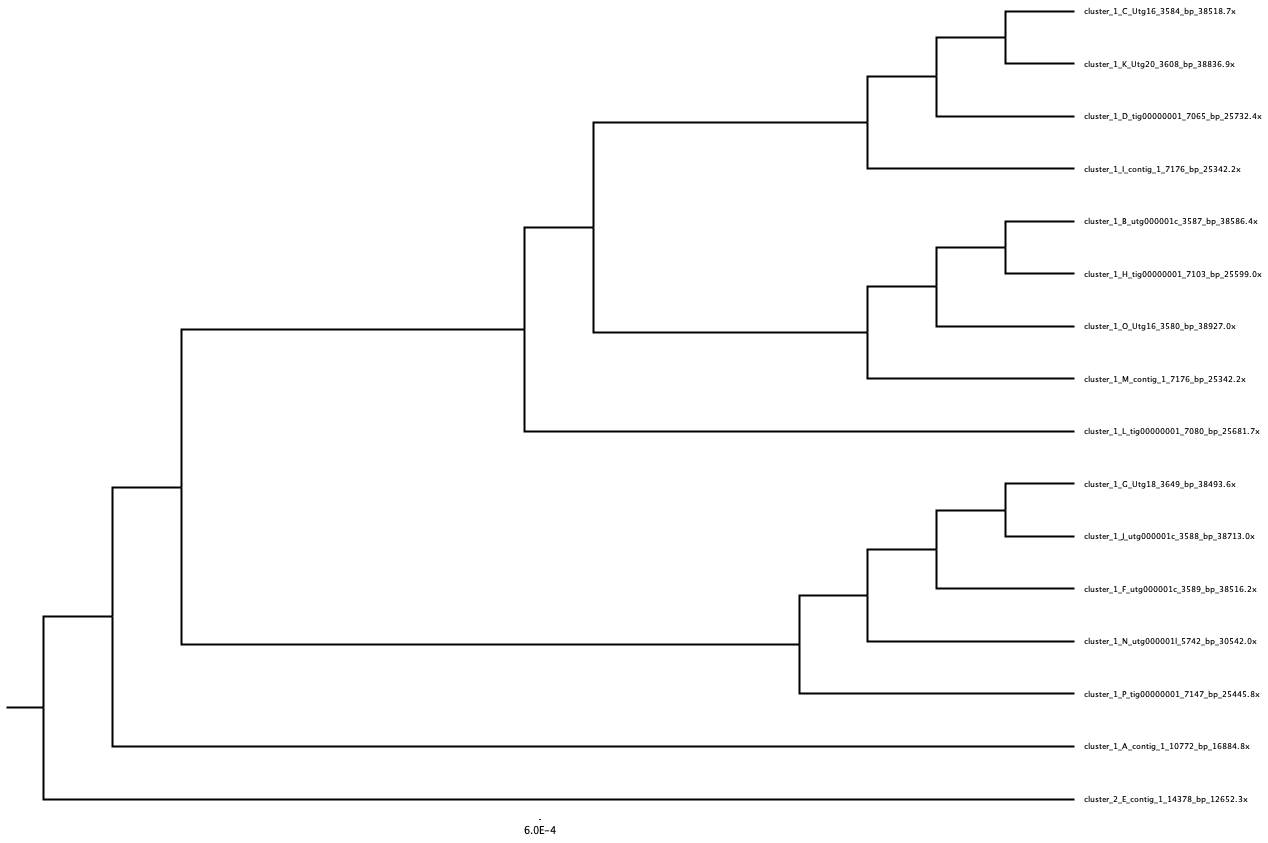

For this figure I used figtree and the created ```contigs.newick``` file from trycycler clustering.
Since we expect that only one plasmid was present in our sample, theoretically only one cluster should be generated. Therefore, cluster 002 is removed. I also remove contig A from cluster 1 because it does not look so good. 

In [64]:
!rm -r trycycler/cluster_002/
!rm trycycler/cluster_001/1_contigs/A_contig_1.fasta

### Step 4: Reconciling contigs


In [65]:
!trycycler reconcile --reads ../fastq_pass/filtered_reads_donor_1.fastq --cluster_dir trycycler/cluster_001



Starting Trycycler reconcile (2022-06-28 16:14:11)
    Trycycler reconcile is a tool for reconciling multiple alternative contigs
with each other.

Input reads: ../fastq_pass/filtered_reads_donor_1.fastq
  size = 392,074,389 bytes

Input contigs:
  trycycler/cluster_001/1_contigs/B_utg000001c.fasta (3,587 bp)
  trycycler/cluster_001/1_contigs/C_Utg16.fasta (3,584 bp)
  trycycler/cluster_001/1_contigs/D_tig00000001.fasta (7,065 bp)
  trycycler/cluster_001/1_contigs/F_utg000001c.fasta (3,589 bp)
  trycycler/cluster_001/1_contigs/G_Utg18.fasta (3,649 bp)
  trycycler/cluster_001/1_contigs/H_tig00000001.fasta (7,103 bp)
  trycycler/cluster_001/1_contigs/I_contig_1.fasta (7,176 bp)
  trycycler/cluster_001/1_contigs/J_utg000001c.fasta (3,588 bp)
  trycycler/cluster_001/1_contigs/K_Utg20.fasta (3,608 bp)
  trycycler/cluster_001/1_contigs/L_tig00000001.fasta (7,080 bp)
  trycycler/cluster_001/1_contigs/M_contig_1.fasta (7,176 bp)
  trycycler/cluster_001/1_contigs/N_utg000001l.fasta (5,742 bp)


The Reconciling stopped with an error message because of too much length difference between contigs.

### Dotplots with Flexidot

[Flexidot on GitHub](https://github.com/molbio-dresden/flexidot)


To get the reason for the different contig lengths I created dotplots of all sequences. For this purpose I used the tool flexidot because it is very useful to quickly create such a matrix of many dot plots. For an easier data handling I have combined all fastq files. but it is also possible to enter the data individually as input. 

In [67]:
cat trycycler/cluster_001/1_contigs/*.fasta > cat_assemblies.fasta

In [ ]:
python ~/work/tools/flexidot_v1.06.py -i ~/Desktop/plasmide/plasmid_donor_1/trycycler/cat_assemblies.fasta  -p 2 -D y -f 0 -t y -k 15 -w n -r y -B steelblue -C salmon -R 0 -A 3 -P 20 -E15 -F 0.1

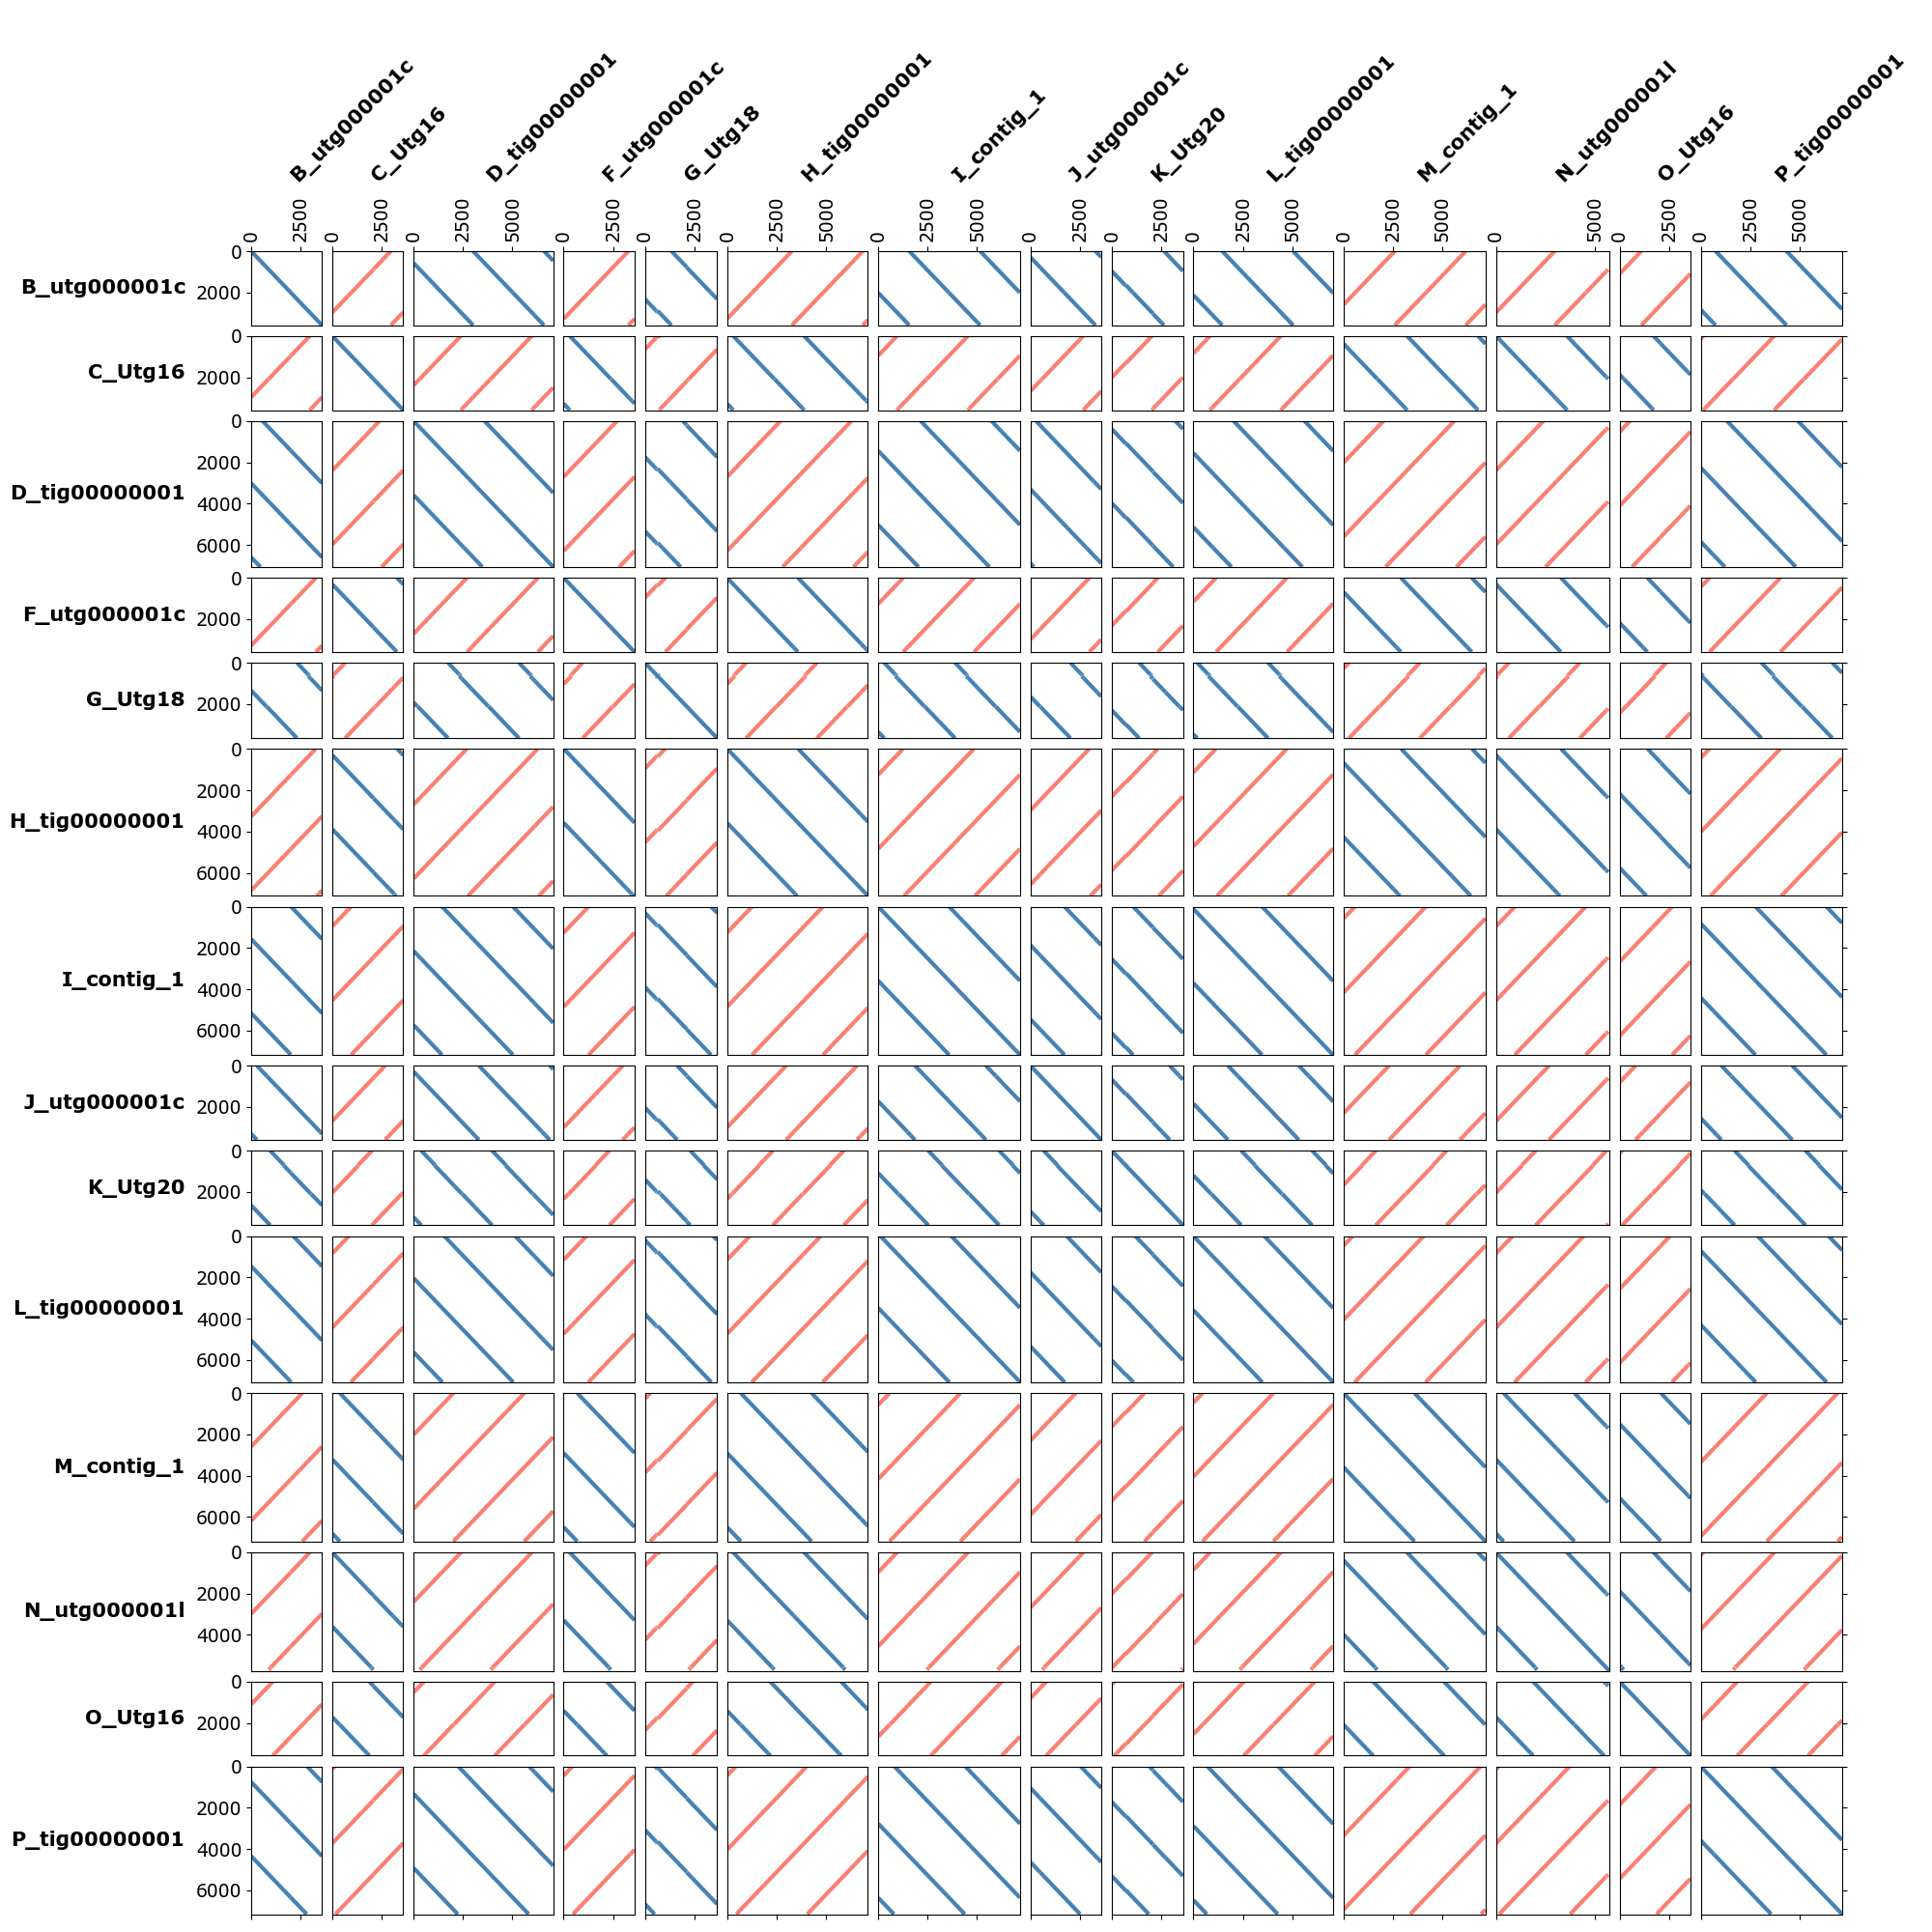

The dotplots show very well the reason for the longer than average length of the contigs: The plasmid sequence was duplicated in some contigs. This can be seen in contigs D, H, I, L, M, N and P. I then removed the duplication by hand in Vim. For this I selected a short sequence (approx. 50bp) which was to be found two times in the sequence ```:/TACC...GGT``` and ```n``` . With ```:%s/.\{-}TACC...GGT/TACC...GGT``` I removed all bases before the first hit. Subsequently I moved the cursor to the first base of the second hit ```:/TACC...GGT``` and ```n```, then I used ```dw``` to remove all bases after the actual cursor position. Finally I saved the changed sequence again with ```:x```. 


This is with one hundred percent probability not the smoothest way but it works :D You are very welcome to find a more elegant way.



### removing duplications

In [1]:
pwd

'/Users/nschoen/Desktop/plasmide/plasmid_donor_1'

In [2]:
ls -l


total 156456
-rw-r--r--@   1 nschoen  staff   8388696 28 Jun 16:57 assembly_donor.ipynb
-rw-r--r--    1 nschoen  staff       245  9 Jun 15:50 barcode_alignment_AFU936_d5b96b58.tsv
drwxr-xr-x   20 nschoen  staff       640 28 Jun 15:41 donor_subsets/
drwxr-xr-x   63 nschoen  staff      2016  9 Jun 16:18 fast5_fail/
drwxr-xr-x  138 nschoen  staff      4416  9 Jun 15:50 fast5_pass/
drwxr-xr-x   63 nschoen  staff      2016  9 Jun 16:18 fastq_fail/
drwxr-xr-x  141 nschoen  staff      4512 21 Jun 14:14 fastq_pass/
-rw-r--r--    1 nschoen  staff       634  9 Jun 15:42 final_summary_AFU936_d5b96b58.txt
drwxr-xr-x    5 nschoen  staff       160 28 Jun 16:28 flexidot/
drwxr-xr-x@  38 nschoen  staff      1216 13 Jun 14:37 nanoplot/
drwxr-xr-x@  20 nschoen  staff       640 14 Jun 16:05 nanoplot_filtered/
drwxr-xr-x    3 nschoen  staff        96  9 Jun 16:18 other_reports/
-rw-r--r--    1 nschoen  staff    390105  9 Jun 16:18 pore_activity_AFU936_d5b96b58.csv
-rw-r--r--@   1 nschoen  staff   1143833 

In [4]:
!cp -r trycycler/trycycler/cluster_001/1_contigs/ trycycler/trycycler/cluster_001/1_contigs_no_dup


### Dotplots with Flexidot 2.0

[Flexidot on GitHub](https://github.com/molbio-dresden/flexidot)

To see if I was successful I created another dotplot. This time there are no duplications. 

In [5]:
pwd

'/Users/nschoen/Desktop/plasmide/plasmid_donor_1'

In [7]:
cd trycycler/trycycler/cluster_001/1_contigs_no_dup/

/Users/nschoen/Desktop/plasmide/plasmid_donor_1/trycycler/trycycler/cluster_001/1_contigs_no_dup


In [8]:
ls -l

total 112
-rw-r--r--@ 1 nschoen  staff  3602 29 Jun 10:50 B_utg000001c.fasta
-rw-r--r--  1 nschoen  staff  3594 29 Jun 10:50 C_Utg16.fasta
-rw-r--r--  1 nschoen  staff  3604 29 Jun 10:54 D_tig00000001.fasta
-rw-r--r--  1 nschoen  staff  3604 29 Jun 10:50 F_utg000001c.fasta
-rw-r--r--  1 nschoen  staff  3659 29 Jun 10:50 G_Utg18.fasta
-rw-r--r--  1 nschoen  staff  3604 29 Jun 10:55 H_tig00000001.fasta
-rw-r--r--  1 nschoen  staff  3601 29 Jun 10:57 I_contig_1.fasta
-rw-r--r--  1 nschoen  staff  3603 29 Jun 10:50 J_utg000001c.fasta
-rw-r--r--  1 nschoen  staff  3618 29 Jun 10:50 K_Utg20.fasta
-rw-r--r--  1 nschoen  staff  3604 29 Jun 11:01 L_tig00000001.fasta
-rw-r--r--  1 nschoen  staff  3601 29 Jun 11:05 M_contig_1.fasta
-rw-r--r--  1 nschoen  staff  3604 29 Jun 11:06 N_utg000001l.fasta
-rw-r--r--  1 nschoen  staff  3590 29 Jun 10:50 O_Utg16.fasta
-rw-r--r--  1 nschoen  staff  3605 29 Jun 11:08 P_tig00000001.fasta


In [9]:
cat *.fasta > cat_contigs_no_dup.fasta

In [ ]:
python ~/work/tools/flexidot_v1.06.py -i ./cat_contigs_no_dup.fasta -p 2 -D y -f 0 -t y -k 15 -w n -r y -B steelblue -C salmon -R 0 -A 3 -P 20 -E15 -F 0.1

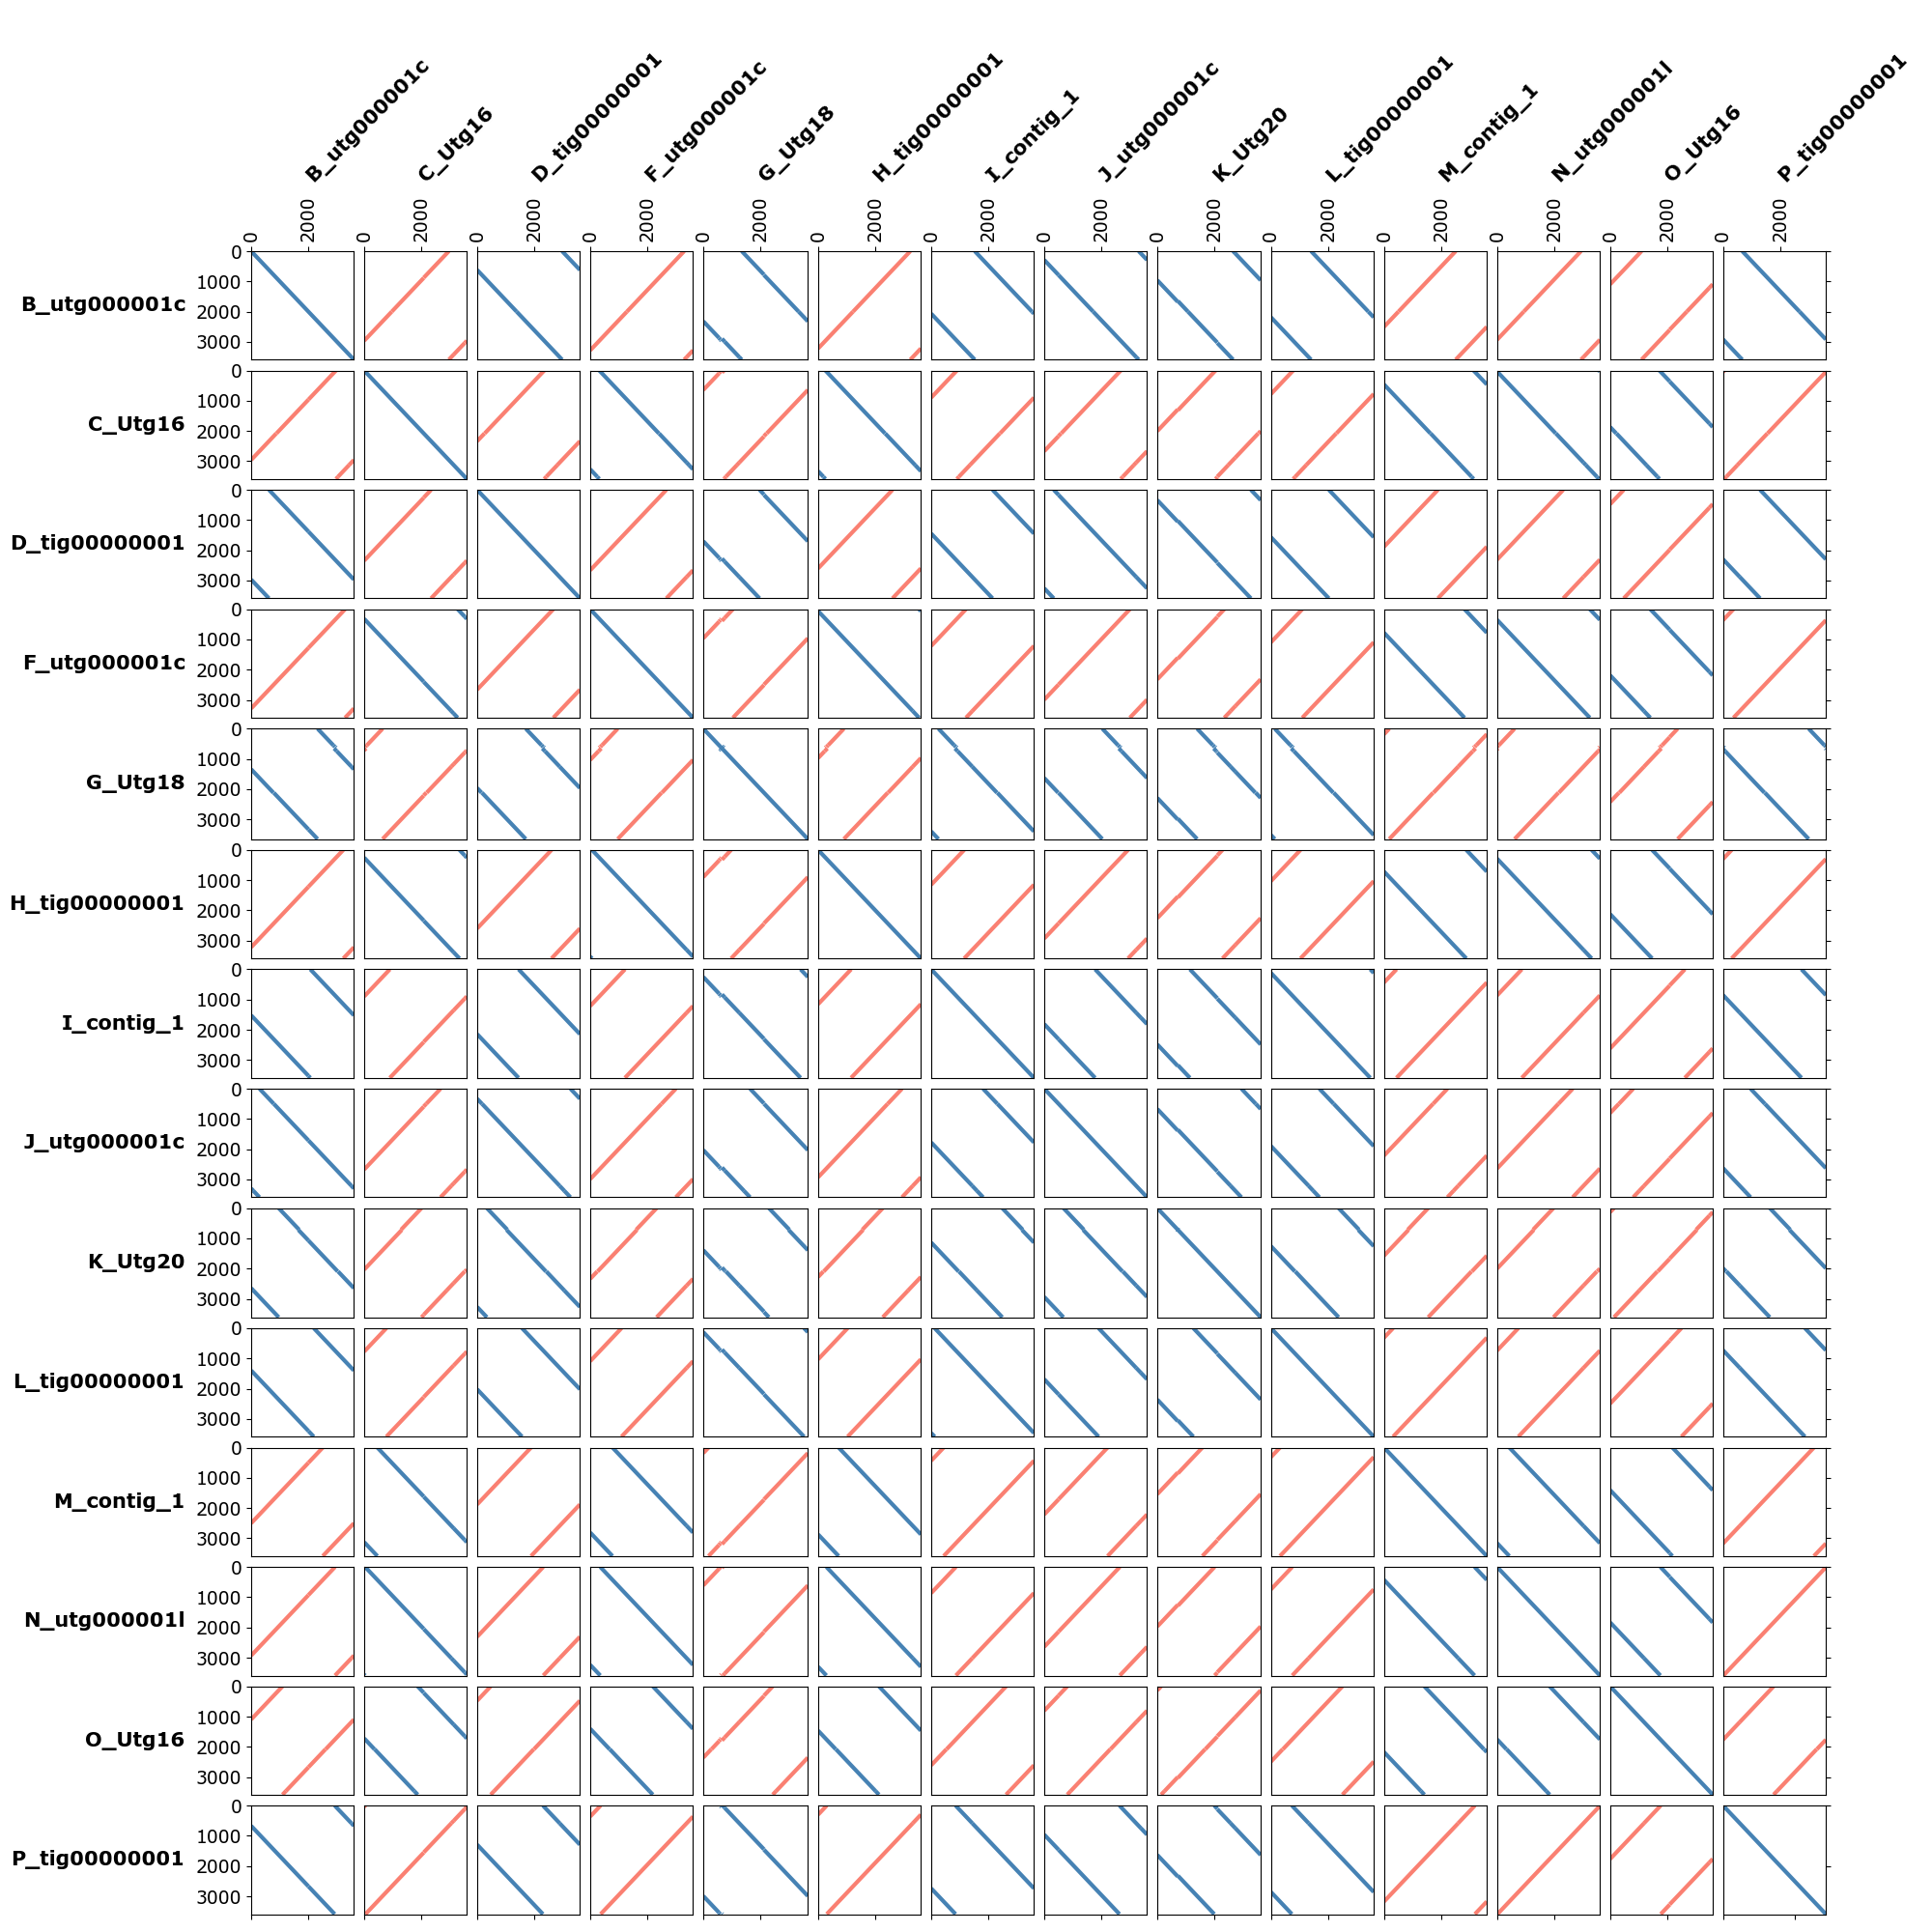

The orange sequences indicate if the reverse compliment of the sequence was used for the dotplot.

### Step 4.2: Reconciling contigs


In [10]:
cd ~/Desktop/plasmide/plasmid_donor_1/trycycler/

/Users/nschoen/Desktop/plasmide/plasmid_donor_1/trycycler


In [12]:
rm -r trycycler/cluster_001/1_contigs/

In [15]:
mv trycycler/cluster_001/1_contigs_no_dup/ trycycler/cluster_001/1_contigs

In [17]:
rm -r trycycler/cluster_001/1_contigs/cat_contigs_no_dup.fasta

In [18]:
!trycycler reconcile --reads ../fastq_pass/filtered_reads_donor_1.fastq --cluster_dir trycycler/cluster_001/



Starting Trycycler reconcile (2022-06-29 11:27:09)
    Trycycler reconcile is a tool for reconciling multiple alternative contigs
with each other.

Input reads: ../fastq_pass/filtered_reads_donor_1.fastq
  size = 392,074,389 bytes

Input contigs:
  trycycler/cluster_001/1_contigs/B_utg000001c.fasta (3,587 bp)
  trycycler/cluster_001/1_contigs/C_Utg16.fasta (3,584 bp)
  trycycler/cluster_001/1_contigs/D_tig00000001.fasta (3,588 bp)
  trycycler/cluster_001/1_contigs/F_utg000001c.fasta (3,589 bp)
  trycycler/cluster_001/1_contigs/G_Utg18.fasta (3,649 bp)
  trycycler/cluster_001/1_contigs/H_tig00000001.fasta (3,588 bp)
  trycycler/cluster_001/1_contigs/I_contig_1.fasta (3,588 bp)
  trycycler/cluster_001/1_contigs/J_utg000001c.fasta (3,588 bp)
  trycycler/cluster_001/1_contigs/K_Utg20.fasta (3,608 bp)
  trycycler/cluster_001/1_contigs/L_tig00000001.fasta (3,588 bp)
  trycycler/cluster_001/1_contigs/M_contig_1.fasta (3,588 bp)
  trycycler/cluster_001/1_contigs/N_utg000001l.fasta (3,589 bp)


    no adjustment needed (B_utg000001c is already circular)
  using P_tig00000001:
    no adjustment needed (B_utg000001c is already circular)
  circularisation complete (3,587 bp)

Circularising C_Utg16:
  using B_utg000001c:
    no adjustment needed (C_Utg16 is already circular)
  using D_tig00000001:
    no adjustment needed (C_Utg16 is already circular)
  using F_utg000001c:
    unable to circularise: C_Utg16's end could not be found in F_utg000001c
  using G_Utg18:
    unable to circularise: C_Utg16's start could not be found in G_Utg18
  using H_tig00000001:
    unable to circularise: C_Utg16's end could not be found in H_tig00000001
  using I_contig_1:
    no adjustment needed (C_Utg16 is already circular)
  using J_utg000001c:
    no adjustment needed (C_Utg16 is already circular)
  using K_Utg20:
    no adjustment needed (C_Utg16 is already circular)
  using L_tig00000001:
    no adjustment needed (C_Utg16 is already circular)
  using M_contig_1:
    no adjustment needed (C_Ut

    no adjustment needed (J_utg000001c is already circular)
  circularisation complete (3,588 bp)

Circularising K_Utg20:
  using B_utg000001c:
    no adjustment needed (K_Utg20 is already circular)
  using C_Utg16:
    no adjustment needed (K_Utg20 is already circular)
  using D_tig00000001:
    unable to circularise: K_Utg20's start could not be found in D_tig00000001
  using F_utg000001c:
    no adjustment needed (K_Utg20 is already circular)
  using G_Utg18:
    no adjustment needed (K_Utg20 is already circular)
  using H_tig00000001:
    no adjustment needed (K_Utg20 is already circular)
  using I_contig_1:
    no adjustment needed (K_Utg20 is already circular)
  using J_utg000001c:
    no adjustment needed (K_Utg20 is already circular)
  using L_tig00000001:
    no adjustment needed (K_Utg20 is already circular)
  using M_contig_1:
    no adjustment needed (K_Utg20 is already circular)
  using N_utg000001l:
    no adjustment needed (K_Utg20 is already circular)
  using O_Utg16:
 

J_utg000001c:  + strand (using original sequence)
K_Utg20:       + strand (using original sequence)
L_tig00000001: + strand (using original sequence)
M_contig_1:    + strand (using original sequence)
N_utg000001l:  + strand (using original sequence)
O_Utg16:       + strand (using original sequence)
P_tig00000001: + strand (using original sequence)


Rotating contigs to starting sequence (2022-06-29 11:27:26)
    For a circular contig, any point in the sequence is a valid starting
position and it can thus be 'rotated' by moving sequence from the contig start
to the contig end. In this step, Trycycler rotates each contig such that it
begins with the starting sequence, ensuring that all contigs begin and end
together so they can be aligned to each other.

B_utg000001c: rotating by 2,187 bp
   AGAGGTAGTTGGCGTCATCG...GAAGTATCGACTCAACTATC (3,587 bp)

C_Utg16: rotating by 1,562 bp
   AGAGGTAGTTGGCGTCATCG...GAAGTATCGACTCAACTATC (3,584 bp)

D_tig00000001: rotating by 2,809 bp
   AGAGGTAGTTGGCGT

Because the pairwise identities with contig G were below the minimum allowed value of 98.0%, I removed it from our data set.

In [19]:
rm -r trycycler/cluster_001/1_contigs/G_Utg18.fasta

After removig contig G I tried ```trycycler reconcile``` again, this time without any error.

In [20]:
!trycycler reconcile --reads ../fastq_pass/filtered_reads_donor_1.fastq --cluster_dir trycycler/cluster_001/


Starting Trycycler reconcile (2022-06-29 11:28:55)
    Trycycler reconcile is a tool for reconciling multiple alternative contigs
with each other.

Input reads: ../fastq_pass/filtered_reads_donor_1.fastq
  size = 392,074,389 bytes

Input contigs:
  trycycler/cluster_001/1_contigs/B_utg000001c.fasta (3,587 bp)
  trycycler/cluster_001/1_contigs/C_Utg16.fasta (3,584 bp)
  trycycler/cluster_001/1_contigs/D_tig00000001.fasta (3,588 bp)
  trycycler/cluster_001/1_contigs/F_utg000001c.fasta (3,589 bp)
  trycycler/cluster_001/1_contigs/H_tig00000001.fasta (3,588 bp)
  trycycler/cluster_001/1_contigs/I_contig_1.fasta (3,588 bp)
  trycycler/cluster_001/1_contigs/J_utg000001c.fasta (3,588 bp)
  trycycler/cluster_001/1_contigs/K_Utg20.fasta (3,608 bp)
  trycycler/cluster_001/1_contigs/L_tig00000001.fasta (3,588 bp)
  trycycler/cluster_001/1_contigs/M_contig_1.fasta (3,588 bp)
  trycycler/cluster_001/1_contigs/N_utg000001l.fasta (3,589 bp)
  trycycler/cluster_001/1_contigs/O_Utg16.fasta (3,580 bp)


    no adjustment needed (C_Utg16 is already circular)
  using K_Utg20:
    no adjustment needed (C_Utg16 is already circular)
  using L_tig00000001:
    no adjustment needed (C_Utg16 is already circular)
  using M_contig_1:
    no adjustment needed (C_Utg16 is already circular)
  using N_utg000001l:
    unable to circularise: C_Utg16's start could not be found in N_utg000001l
  using O_Utg16:
    no adjustment needed (C_Utg16 is already circular)
  using P_tig00000001:
    unable to circularise: C_Utg16's start could not be found in P_tig00000001
  circularisation complete (3,584 bp)

Circularising D_tig00000001:
  using B_utg000001c:
    no adjustment needed (D_tig00000001 is already circular)
  using C_Utg16:
    no adjustment needed (D_tig00000001 is already circular)
  using F_utg000001c:
    no adjustment needed (D_tig00000001 is already circular)
  using H_tig00000001:
    no adjustment needed (D_tig00000001 is already circular)
  using I_contig_1:
    no adjustment needed (D_ti

    no adjustment needed (M_contig_1 is already circular)
  using F_utg000001c:
    no adjustment needed (M_contig_1 is already circular)
  using H_tig00000001:
    no adjustment needed (M_contig_1 is already circular)
  using I_contig_1:
    no adjustment needed (M_contig_1 is already circular)
  using J_utg000001c:
    no adjustment needed (M_contig_1 is already circular)
  using K_Utg20:
    no adjustment needed (M_contig_1 is already circular)
  using L_tig00000001:
    unable to circularise: M_contig_1's start could not be found in L_tig00000001
  using N_utg000001l:
    no adjustment needed (M_contig_1 is already circular)
  using O_Utg16:
    no adjustment needed (M_contig_1 is already circular)
  using P_tig00000001:
    no adjustment needed (M_contig_1 is already circular)
  circularisation complete (3,588 bp)

Circularising N_utg000001l:
  using B_utg000001c:
    no adjustment needed (N_utg000001l is already circular)
  using C_Utg16:
    unable to circularise: N_utg000001l's

### Step 5: Multiple sequence alignment

In [24]:
pwd

'/Users/nschoen/Desktop/plasmide/plasmid_donor_1/trycycler'

In [25]:
ls -l

total 152
-rw-r--r--   1 nschoen  staff  73864 28 Jun 16:19 cat_assemblies.fasta
drwxr-xr-x  19 nschoen  staff    608 28 Jun 15:55 init_assemblies/
drwxr-xr-x   7 nschoen  staff    224 28 Jun 16:12 trycycler/


In [26]:
!trycycler msa --cluster_dir trycycler/cluster_001


Starting Trycycler MSA (2022-06-29 11:44:10)
    Trycycler MSA is a tool for conducting global multiple sequence alignment
of contig sequences.

Input sequences:
  B_utg000001c: 3,587 bp
  C_Utg16: 3,584 bp
  D_tig00000001: 3,588 bp
  F_utg000001c: 3,589 bp
  H_tig00000001: 3,588 bp
  I_contig_1: 3,588 bp
  J_utg000001c: 3,588 bp
  K_Utg20: 3,608 bp
  L_tig00000001: 3,588 bp
  M_contig_1: 3,588 bp
  N_utg000001l: 3,589 bp
  O_Utg16: 3,580 bp
  P_tig00000001: 3,589 bp

Checking required software:
   MUSCLE: v5.1.osx64 []
Built Feb 22 2022 02:38:35


Partitioning sequences (2022-06-29 11:44:10)
    The sequences are now partitioned into smaller chunks to make the multiple
sequence alignment more tractable.

pieces: 4

median piece size: 1,000 bp
max piece size:    1,000 bp


Running Muscle (2022-06-29 11:44:10)
    Trycycler now runs Muscle on each of the pieces to turn them into multiple
sequence alignments.

pieces: 4


Merging MSA (2022-06-29 11:44:14)
    Each of the MSA pieces are 

### Step 6: Running Trycycler partition


In [28]:
!trycycler partition --reads ../fastq_pass/filtered_reads_donor_1.fastq --cluster_dirs trycycler/cluster_001


Starting Trycycler partitioning (2022-06-29 11:47:50)
    Trycycler partition is a tool for partitioning reads by cluster. I.e. each
read will be assigned to one cluster and saved in a file for that cluster.

Input reads: ../fastq_pass/filtered_reads_donor_1.fastq
  56,914 reads (186,235,929 bp)
  N50 = 3,644 bp

Input clusters:
  trycycler/cluster_001/2_all_seqs.fasta: 13 contigs, mean length = 3,588 bp

Checking required software:
  minimap2: v2.24-r1122


Aligning reads to each contig (2022-06-29 11:47:50)
    The reads are independently aligned to each of the contigs and Trycycler
will remember the single best alignment for each read.

 B_utg000001c (3,587 bp): 66,006 alignments
      C_Utg16 (3,584 bp): 65,871 alignments
D_tig00000001 (3,588 bp): 65,905 alignments
 F_utg000001c (3,589 bp): 65,901 alignments
H_tig00000001 (3,588 bp): 65,905 alignments
   I_contig_1 (3,588 bp): 65,905 alignments
 J_utg000001c (3,588 bp): 65,876 alignments
      K_Utg20 (3,608 bp): 65,949 alignments

In [30]:
!trycycler consensus --cluster_dir trycycler/cluster_001


Starting Trycycler consensus (2022-06-29 11:50:23)
    Trycycler consensus is the final stage of the Trycycler pipeline. It
operates on one replicon (i.e. cluster) at a time. It takes the multiple
sequence alignment of alternative contig sequences and combines them into a
single consensus sequence. Where needed, it will use read alignments to help
choose which variants to include/exclude from the consensus sequence. If all
goes well, the final consensus will be free of any large-scale errors.

Input reads: trycycler/cluster_001/4_reads.fastq
  55,680 reads (184,723,110 bp)
  N50 = 3,644 bp

Input contigs: trycycler/cluster_001/2_all_seqs.fasta
  B_utg000001c: 3,587 bp
  C_Utg16: 3,584 bp
  D_tig00000001: 3,588 bp
  F_utg000001c: 3,589 bp
  H_tig00000001: 3,588 bp
  I_contig_1: 3,588 bp
  J_utg000001c: 3,588 bp
  K_Utg20: 3,608 bp
  L_tig00000001: 3,588 bp
  M_contig_1: 3,588 bp
  N_utg000001l: 3,589 bp
  O_Utg16: 3,580 bp
  P_tig00000001: 3,589 bp

Checking required software:
  minima

After running the complete trycycler pipeline, we now have our assembled plasmid available as a fasta file.

However, I still decided to polish the assembly with Medaka. 

### Polishing with Medaka

[Medaka on GitHub](https://github.com/nanoporetech/medaka)


I used Medaka for polishing because it is currently one of the best polishing tools for nanopore data. The tool was also developed by Oxford Nanopore. Unfortunately, there was no Medaka model version available for the FlowCells and Guppy version I used, so I decided to use a model that is as close as possible. 

In [ ]:
!medaka_consensus -i 4_reads.fastq -d 7_final_consensus.fasta -o medaka -m r941_min_hac_g507

In my assembly, a total of 4 bases were inserted into the assembly during polishing. All four in homopolymer regions. 

### Annotation

Now the assembly is finished and we can use the fasta file for annotation. However, the annotation of assemblies can be very complex. Therefore I recommend to use beginner friendly tools like plannotate or snapgene for the first steps. 

# Assembly of plz_donor_guide

The commands I used for the assembly of plz donor guide are listed below. The complete sequence can be found in Opal. 

In [ ]:
cd ~/Desktop/plasmide/plasmid_donor_guide_1

#QC with nanoplot
mkdir nanoplot
nanoplot -t 10 -o ./nanoplot/  -p "plz_donor_guide" -f svg --drop_outliers --plots kde --loglength --N50 --title "plz_donor_guide" --summary sequencing_summary_AFU773_cf873d2d.txt 
gunzip fastq_pass/donor_guide_1_pass.fastq.gz
cd fastq_pass

#filtering
nanofilt -q 10 -l 1000 --maxlength 4300 -s ../sequencing_summary_AFU773_cf873d2d.txt donor_guide_1_pass.fastq | gzip > filtered_reads_donor_guide_1.fastq.gz 
gunzip filtered_reads_donor_guide_1.fastq.gz

#QC after filtering
mkdir ../nanoplot_filtered
nanoplot -t 10 -o ../nanoplot_filtered/  -p "plz_donor_guide_filtered_" -f svg --plots kde -c red --loglength --N50 --title "plz_donor_guide_filtered" --fastq ./filtered_reads_donor_guide_1.fastq 

#trycycler subsampling
cd ..
mkdir donor_guide_subsets
trycycler subsample --reads fastq_pass/filtered_reads_donor_guide_1.fastq --out_dir donor_guide_subsets --genome_size 4000 --count 16
cd donor_guide_subsets

# create initial assemblies
mkdir init_assemblies
#flye
flye --nano-raw sample_01.fastq -t 10 -g 4000 --out-dir assembly_01 && cp assembly_01/assembly.fasta init_assemblies/assembly_01.fasta && rm -r assembly_01
flye --nano-raw sample_04.fastq -t 10 -g 4000 --out-dir assembly_05 && cp assembly_05/assembly.fasta init_assemblies/assembly_05.fasta && rm -r assembly_05
flye --nano-raw sample_09.fastq -t 10 -g 4000 --out-dir assembly_09 && cp assembly_09/assembly.fasta init_assemblies/assembly_09.fasta && rm -r assembly_09
flye --nano-raw sample_13.fastq -t 10 -g 4000 --out-dir assembly_13 && cp assembly_13/assembly.fasta init_assemblies/assembly_13.fasta && rm -r assembly_13
#minipolish
~/Desktop/plasmide/miniasm_and_minipolish.sh sample_02.fastq 10 > assembly_02.gfa && any2fasta assembly_02.gfa > init_assemblies/assembly_02.fasta && rm assembly_02.gfa
~/Desktop/plasmide/miniasm_and_minipolish.sh sample_06.fastq 10 > assembly_06.gfa && any2fasta assembly_06.gfa > init_assemblies/assembly_06.fasta && rm assembly_06.gfa
~/Desktop/plasmide/miniasm_and_minipolish.sh sample_10.fastq 10 > assembly_10.gfa && any2fasta assembly_10.gfa > init_assemblies/assembly_10.fasta && rm assembly_10.gfa
~/Desktop/plasmide/miniasm_and_minipolish.sh sample_14.fastq 10 > assembly_14.gfa && any2fasta assembly_14.gfa > init_assemblies/assembly_14.fasta && rm assembly_14.gfa
#raven
raven --threads 10 sample_03.fastq > init_assemblies/assembly_03.fasta && rm raven.cereal
raven --threads 10 sample_07.fastq > init_assemblies/assembly_07.fasta && rm raven.cereal
raven --threads 10 sample_11.fastq > init_assemblies/assembly_11.fasta && rm raven.cereal
raven --threads 10 sample_15.fastq > init_assemblies/assembly_15.fasta && rm raven.cereal
#canu
conda activate canu
canu -p canu -d canu_temp -genomeSize=4000 -nanopore-raw sample_04.fastq && cp canu_temp/canu.contigs.fasta init_assemblies/assembly_04.fasta && rm -rf canu_temp
canu -p canu -d canu_temp -genomeSize=4000 -nanopore-raw sample_08.fastq && cp canu_temp/canu.contigs.fasta init_assemblies/assembly_08.fasta && rm -rf canu_temp
canu -p canu -d canu_temp -genomeSize=4000 -nanopore-raw sample_12.fastq && cp canu_temp/canu.contigs.fasta init_assemblies/assembly_12.fasta && rm -rf canu_temp
canu -p canu -d canu_temp -genomeSize=4000 -nanopore-raw sample_16.fastq && cp canu_temp/canu.contigs.fasta init_assemblies/assembly_16.fasta && rm -rf canu_temp

conda activate bioinfo
ls -l init_assemblies

#trycycler clustering
trycycler cluster --assemblies init_assemblies/*.fasta --reads ../fastq_pass/filtered_reads_donor_guide_1.fastq --out_dir trycycler

#show distance tree in figtree after clustering
figtree

# dotplot with flexidot to detect duplicated plasmidsequences
cat trycycler/cluster_001/1_contigs/*.fasta > trycycler/cat_assemblies.fasta
conda activate flexidot
python ~/work/tools/flexidot_v1.06.py -i trycycler/cat_assemblies.fasta  -p 2 -D y -f 0 -t y -k 15 -w n -r y -B steelblue -C salmon -R 0 -A 3 -P 20 -E15 -F 0.1

# remove duplications by hand in texteditor
conda activate bioinfo
cd trycycler/cluster_001/1_contigs/
vim A_contig_1.fasta
vim D_tig00000001.fasta
vim E_contig_1.fasta
vim H_tig00000001.fasta
vim I_contig_1.fasta
vim L_tig00000001.fasta
vim M_contig_1.fasta
vim P_tig00000001.fasta

#trycycler reconcile
cd ../..
cd ..
trycycler reconcile --reads ../fastq_pass/filtered_reads_donor_guide_1.fastq --cluster_dir trycycler/cluster_001
rm trycycler/cluster_001/1_contigs/B_utg000001c.fasta
trycycler reconcile --reads ../fastq_pass/filtered_reads_donor_guide_1.fastq --cluster_dir trycycler/cluster_001

#trycycler msa & partition & consensus
trycycler msa --cluster_dir trycycler/cluster_001
trycycler partition --reads ../fastq_pass/filtered_reads_donor_guide_1.fastq --cluster_dirs trycycler/cluster_001
trycycler consensus --cluster_dir trycycler/cluster_001
cd trycycler/
cd cluster_001

#polishing with medaka
medaka_consensus -i 4_reads.fastq -d 7_final_consensus.fasta -o medaka -m r941_min_hac_g507

# Assembly of pBR

The commands I used for the assembly of pBR are listed below. The complete sequence can be found in Opal. 

In [ ]:
cd ~/Desktop/plasmide/plasmid_pBR_2\n

#QC with nanoplot
mkdir nanoplot
conda activate bioinfo
nanoplot -t 10 -o ./nanoplot/  -p "pBR2" -f svg --plots kde --loglength --N50 --title "pBR2" --summary sequencing_summary_AFU915_38253080.txt \n
cd fastq_pass\n

#filtering
nanofilt -q 8 -l 1000 --maxlength 10200 -s ../sequencing_summary_AFU915_38253080.txt pBR_2_pass.fastq | gzip > filtered_reads_pBR_2.fastq.gz \n
gunzip filtered_reads_pBR_2.fastq.gz

#QC after filtering
mkdir ../nanoplot_filtered
nanoplot -t 10 -o ../nanoplot_filtered/  -p "pBR_filtered" -f svg --plots kde -c red --loglength --N50 --title "pBR_filtered" --fastq ./filtered_reads_pBR_2.fastq \n
cd ..

#trycycler subsampling
mkdir pBR_subsets\n
trycycler subsample --reads fastq_pass/filtered_reads_pBR_2.fastq --out_dir pBR_subsets --genome_size 10000 --count 12\n
cd pBR_subsets

#create initial assemblies
mkdir init_assemblies
#flye
flye --nano-raw sample_01.fastq -t 10 -g 10000 --out-dir assembly_01 && cp assembly_01/assembly.fasta init_assemblies/assembly_01.fasta && rm -r assembly_01
flye --nano-raw sample_04.fastq -t 10 -g 10000 --out-dir assembly_05 && cp assembly_05/assembly.fasta init_assemblies/assembly_05.fasta && rm -r assembly_05
flye --nano-raw sample_09.fastq -t 10 -g 10000 --out-dir assembly_09 && cp assembly_09/assembly.fasta init_assemblies/assembly_09.fasta && rm -r assembly_09
#minipolish
~/Desktop/plasmide/miniasm_and_minipolish.sh sample_02.fastq 10 > assembly_02.gfa && any2fasta assembly_02.gfa > init_assemblies/assembly_02.fasta && rm assembly_02.gfa
~/Desktop/plasmide/miniasm_and_minipolish.sh sample_06.fastq 10 > assembly_06.gfa && any2fasta assembly_06.gfa > init_assemblies/assembly_06.fasta && rm assembly_06.gfa
~/Desktop/plasmide/miniasm_and_minipolish.sh sample_10.fastq 10 > assembly_10.gfa && any2fasta assembly_10.gfa > init_assemblies/assembly_10.fasta && rm assembly_10.gfa
#raven
raven --threads 10 sample_03.fastq > init_assemblies/assembly_03.fasta && rm raven.cereal
raven --threads 10 sample_07.fastq > init_assemblies/assembly_07.fasta && rm raven.cereal
raven --threads 10 sample_11.fastq > init_assemblies/assembly_11.fasta && rm raven.cereal
#canu
conda activate canu
canu -p canu -d canu_temp -genomeSize=10000 -nanopore-raw sample_04.fastq && cp canu_temp/canu.contigs.fasta init_assemblies/assembly_04.fasta && rm -rf canu_temp
canu -p canu -d canu_temp -genomeSize=10000 -nanopore-raw sample_08.fastq && cp canu_temp/canu.contigs.fasta init_assemblies/assembly_08.fasta && rm -rf canu_temp
canu -p canu -d canu_temp -genomeSize=10000 -nanopore-raw sample_12.fastq && cp canu_temp/canu.contigs.fasta init_assemblies/assembly_12.fasta && rm -rf canu_temp

conda activate bioinfo
ls -l init_assemblies

#trycycler clustering
trycycler cluster --assemblies init_assemblies/*.fasta --reads ../fastq_pass/filtered_reads_pBR_2.fastq --out_dir trycycler

#show distance tree in figtree after clustering
figtree

# dotplot with flexidot to detect duplicated plasmidsequences
cat trycycler/cluster_001/1_contigs/*.fasta > trycycler/cat_assemblies.fasta
conda activate flexidot
python ~/work/tools/flexidot_v1.06.py -i trycycler/cat_assemblies.fasta  -p 2 -D y -f 0 -t y -k 15 -w n -r y -B steelblue -C salmon -R 0 -A 3 -P 20 -E15 -F 0.1\n

# remove duplications by hand in texteditor
conda activate bioinfo
cd trycycler/cluster_001/1_contigs/
vim D_tig00000001.fasta
vim D_tig00000001.fasta
vim H_tig00000001.fasta
vim I_contig_1.fasta
vim L_tig00000001.fasta

#trycycler reconcile
cd ../../
cd ..
trycycler reconcile --reads ../fastq_pass/filtered_reads_pBR_2.fastq --cluster_dir trycycler/cluster_001

#trycycler msa & partition & consensus
trycycler msa --cluster_dir trycycler/cluster_001
trycycler partition --reads ../fastq_pass/filtered_reads_pBR_2.fastq --cluster_dirs trycycler/cluster_001
trycycler consensus --cluster_dir trycycler/cluster_001
cd trycycler/cluster_001/

#polishing with medaka
medaka_consensus -i 4_reads.fastq -d 7_final_consensus.fasta -o medaka -m r941_min_hac_g507
